# Participant ID:S02

### Content:
- Correlation matrix 
- Comfort Function implementation
- Weather Station Data (During Commuting)
- Weather Station Data (Day of Commuting from 8am to 6pm)
- Living Lab (Day of Commuting from 8am to 6pm)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime


In [2]:
## Read the CSV file into a DataFrame
S02_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/process_data/S02_final_df.csv'

S02_df = pd.read_csv(S02_path, index_col=False, parse_dates=['DateTime'])

In [ ]:
S02_df.columns

In [ ]:
# Set 'DateTime' column as the index
S02_df.set_index('DateTime', inplace=True)

# Group by the unique ID instances
grouped = S02_df.groupby('ID_instance')

# Prepare a list to store the results
results = []

# Iterate through each group
for name, group in grouped:
    # Sort the group by DateTime if not already sorted
    group = group.sort_index()
    
    # Calculate the duration
    start_time = group.index[0]
    end_time = group.index[-1]
    duration = end_time - start_time
    
    # Calculate the min, max, and avg for Temp(C)_N1 and RH(%)_N1
    temp_n1_min = group['Temp(C)_N1'].min()
    temp_n1_max = group['Temp(C)_N1'].max()
    temp_n1_avg = group['Temp(C)_N1'].mean()
    
    rh_n1_min = group['RH(%)_N1'].min()
    rh_n1_max = group['RH(%)_N1'].max()
    rh_n1_avg = group['RH(%)_N1'].mean()
    
    # Append the result to the list
    results.append([name, start_time, end_time, duration, 
                    temp_n1_min, temp_n1_max, temp_n1_avg, 
                    rh_n1_min, rh_n1_max, rh_n1_avg])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['ID_instance', 'Start Time', 'End Time', 'Duration', 
                                            'Temp(C)_N1_min', 'Temp(C)_N1_max', 'Temp(C)_N1_avg',
                                            'RH(%)_N1_min', 'RH(%)_N1_max', 'RH(%)_N1_avg'])

# Print the results as a table
print(results_df)

In [ ]:
# Group by 'id_instance' and calculate time duration
time_duration = S02_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())

# Convert time duration to seconds for better readability (optional)
time_duration = (time_duration.dt.total_seconds()/60).round(2)
# time_duration = time_duration.round(2)

print(time_duration)

In [ ]:
instances_over_60_minutes = time_duration[time_duration > 60].index

# Remove rows corresponding to instances over 60 minutes inplace
S02_df.drop(S02_df[S02_df['ID_instance'].isin(instances_over_60_minutes)].index, inplace=True)


In [ ]:
S02_df.isnull().sum()

In [ ]:
S02_df.dropna(subset=['ID_instance'], inplace=True)

In [ ]:
S02_df['ID_instance'].unique()

In [ ]:
S02_df.columns

In [ ]:
# Drop columns starting with 'acc_'
S02_df = S02_df.filter(regex='^(?!acc_)')

In [ ]:
S02_df.columns[1:18]

In [ ]:
S02_df.columns[18:30]

### Correlation matrix

In [ ]:
# Selecting physiological features (excluding Subject and Commuting columns)
physiological_data = S02_df.columns[1:18] 

# Selecting environmental parameters
environmental_data = S02_df.columns[18:30] 

# Calculating correlation matrix
correlation_matrix = S02_df[list(physiological_data) + list(environmental_data)].corr(method='spearman')

# Extracting correlations between physiological features and environmental parameters
correlation_phys_env = correlation_matrix.loc[physiological_data, environmental_data]

correlation_phys_env


### Correlation heatmap

In [ ]:
# Define the new column names with LaTeX subscript representation
new_column_names = {
    'Temp(C)_N1': 'T$_{1}$',
    'RH(%)_N1': 'H$_{1}$',
    'Dewpoint(C)_N1': 'D$_{1}$',
    'Temp(C)_N2': 'T$_{2}$',
    'RH(%)_N2': 'H$_{2}$',
    'Dewpoint(C)_N2': 'D$_{2}$',
    'Temp(C)_N3': 'T$_{3}$',
    'RH(%)_N3': 'H$_{3}$',
    'Dewpoint(C)_N3': 'D$_{3}$',
    'Temp(C)_N4': 'T$_{4}$',
    'RH(%)_N4': 'H$_{4}$',
    'Dewpoint(C)_N4': 'D$_{4}$',

    'hrv_vlf': 'HRV$_1$',
    'hrv_lf': 'HRV$_2$',
    'hrv_hf': 'HRV$_3$',
    'hrv_sdnn': 'HRV$_4$',
    'hrv_rmssd': 'HRV$_5$',
    'hrv_mean_nni': 'HRV$_6$',
    'hrv_median_nni': 'HRV$_7$',
    'hrv_range_nni': 'HRV$_8$',
    'hrv_entropy': 'HRV$_9$',

    'eda_tonic_mean': 'EDA$_1$',
    'eda_tonic_std': 'EDA$_2$',
    'eda_tonic_sum': 'EDA$_3$',
    'eda_tonic_energy': 'EDA$_4$',
    'eda_phasic_mean': 'EDA$_5$',
    'eda_phasic_std': 'EDA$_6$',
    'eda_phasic_sum': 'EDA$_7$',
    'eda_phasic_energy': 'EDA$_8$',

    # 'acc_acc_x_min': 'ACC$_1$',
    # 'acc_acc_y_min': 'ACC$_2$' ,
    # 'acc_acc_z_min': 'ACC$_3$', 
    # 'acc_l2_min': 'ACC$_4$',
    # 'acc_acc_x_max': 'ACC$_5$',
    # 'acc_acc_y_max': 'ACC$_6$', 
    # 'acc_acc_z_max': 'ACC$_7$', 
    # 'acc_l2_max': 'ACC$_8$',
    # 'acc_acc_x_ptp': 'ACC$_9$', 
    # 'acc_acc_y_ptp': 'ACC$_{10}$', 
    # 'acc_acc_z_ptp': 'ACC$_{11}$', 
    # 'acc_l2_ptp': 'ACC$_{12}$'
}

# Rename columns
correlation_phys_env_renamed = correlation_phys_env.rename(columns=new_column_names, index=new_column_names)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_phys_env_renamed, annot=True, cmap='coolwarm', fmt=".2f")

# Add titles and labels
# plt.title('S02')
# plt.xlabel('environmental parameters', fontsize=14)
# plt.ylabel('physiological features', fontsize=14)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)
plt.xticks(rotation=0)

# Save the plot as eps & png file
outpath = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/viz/'
plt.savefig(outpath+'S02_heatmap.eps', format='eps', bbox_inches='tight')
plt.savefig(outpath+'S02_heatmap.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


### Comfort function Implementation

In [ ]:
# List of all physiological variables
physio_vars = ['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
               'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
               'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
               'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy']

# Environmental variables to consider
env_vars = ['Temp(C)_N1', 'RH(%)_N1']

# Compute Spearman correlations
correlations = S02_df[physio_vars + env_vars].corr(method='spearman')

# HRV and EDA groups for correlation
hrv_vars = physio_vars[:9]  # Assuming the first 9 are HRV related
eda_vars = physio_vars[9:]  # Assuming the rest are EDA related

# Identify one HRV and one EDA variable with the strongest correlation with any environmental variable
strongest_corr_hrv = correlations.loc[hrv_vars, env_vars].abs().max().idxmax()
strongest_corr_eda = correlations.loc[eda_vars, env_vars].abs().max().idxmax()

# Extract the specific HRV and EDA variable names with the highest correlation
strongest_corr_hrv_var = correlations.loc[hrv_vars, env_vars].abs().idxmax()[strongest_corr_hrv]
strongest_corr_eda_var = correlations.loc[eda_vars, env_vars].abs().idxmax()[strongest_corr_eda]

# Define thresholds using the identified variables and adjusted quartiles for environmental variables
thresholds = {
    strongest_corr_hrv_var: S02_df[strongest_corr_hrv_var].quantile(0.75),
    strongest_corr_eda_var: S02_df[strongest_corr_eda_var].quantile(0.25),
    'Temp(C)_N1': [S02_df['Temp(C)_N1'].quantile(0.30), S02_df['Temp(C)_N1'].quantile(0.65)],
    'RH(%)_N1': [S02_df['RH(%)_N1'].quantile(0.30), S02_df['RH(%)_N1'].quantile(0.65)]
}

# Define the comfort function
def comfort_label(row):
    comfort = (row[strongest_corr_hrv_var] >= thresholds[strongest_corr_hrv_var] and
               row[strongest_corr_eda_var] <= thresholds[strongest_corr_eda_var] and
               thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1] and
               thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1])
    
    if comfort:
        return 1
    
    discomfort = (row[strongest_corr_hrv_var] < thresholds[strongest_corr_hrv_var] and
                  row[strongest_corr_eda_var] > thresholds[strongest_corr_eda_var] and
                  not (thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1]) or
                  not (thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1]))
    
    if discomfort:
        return 0
    
    return 0.5  # Sensible label for ambiguous cases

# Apply the comfort function and count labels
S02_df['lambda'] = S02_df.apply(comfort_label, axis=1)
label_counts = S02_df['lambda'].value_counts(normalize=True) * 100

# Print the names of variables used for the comfort function
print("Variables considered for the comfort function:")
print(f"HRV Variable: {strongest_corr_hrv_var}")
print(f"EDA Variable: {strongest_corr_eda_var}")
print("Environmental Variables: Temp(C)_N1, RH(%)_N1")

# Print the percentage of labeled values
print("Label Distribution (%):")
print(label_counts)

print("saving data files as pkl")
savepath = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/final_data/data_S02.pkl'
S02_df.to_pickle(savepath)

In [ ]:
# Group by unique instances
instance_groups = S02_df.groupby('ID_instance')

# Calculate the level of comfort for each instance
comfort_levels = instance_groups['lambda'].mean()  # You can also use .median() or .mode() depending on your preference

# Print the comfort levels
print(comfort_levels)


### Weather Station Data (During Commuting):

In [ ]:
import pandas as pd

# Load the weather data from the uploaded Excel file
file_path = 'C:/Users/Tomar/dev/datasets/weather_summer2023.xlsx'
weather_data = pd.read_excel(file_path)

# Display the first few rows of the weather data to understand its structure
weather_data.head()


In [ ]:
# Define the commuting instance data
commuting_data = [
    {"ID_instance": "S02_1", "Start Time" : "2023-07-31 16:33:54", "End Time": "2023-07-31 16:36:38"},
    {"ID_instance": "S02_2", "Start Time" : "2023-08-01 16:38:07", "End Time": "2023-08-01 16:54:32"},
    {"ID_instance": "S02_3", "Start Time" : "2023-08-01 20:34:40", "End Time": "2023-08-01 20:45:29"},
    {"ID_instance": "S02_4", "Start Time" : "2023-08-02 07:13:16", "End Time": "2023-08-02 07:26:44"},
    {"ID_instance": "S02_5", "Start Time" : "2023-08-02 11:06:22", "End Time": "2023-08-02 11:16:42"},
    {"ID_instance": "S02_6", "Start Time" : "2023-08-02 12:33:00", "End Time": "2023-08-02 12:41:28"},
    {"ID_instance": "S02_7", "Start Time" : "2023-08-02 16:18:34", "End Time": "2023-08-02 16:28:48"},
    {"ID_instance": "S02_8", "Start Time" : "2023-08-03 07:09:01", "End Time": "2023-08-03 07:18:02"},
    {"ID_instance": "S02_9", "Start Time" : "2023-08-03 16:39:40", "End Time": "2023-08-03 16:46:27"},
    {"ID_instance": "S02_10", "Start Time": "2023-08-03 17:21:02", "End Time": "2023-08-03 17:27:24"},
    {"ID_instance": "S02_11", "Start Time": "2023-08-04 22:13:08", "End Time": "2023-08-04 22:24:06"},
    {"ID_instance": "S02_12", "Start Time": "2023-08-05 05:49:36", "End Time": "2023-08-05 06:29:37"},
    {"ID_instance": "S02_13", "Start Time": "2023-08-05 14:05:21", "End Time": "2023-08-05 14:11:50"},
    {"ID_instance": "S02_14", "Start Time": "2023-08-05 15:47:28", "End Time": "2023-08-05 16:17:37"},
    {"ID_instance": "S02_15", "Start Time": "2023-08-06 08:48:20", "End Time": "2023-08-06 09:31:08"},
    {"ID_instance": "S02_16", "Start Time": "2023-08-06 09:48:21", "End Time": "2023-08-06 09:59:58"},
    {"ID_instance": "S02_17", "Start Time": "2023-08-07 07:07:35", "End Time": "2023-08-07 07:15:30"},
    {"ID_instance": "S02_18", "Start Time": "2023-08-07 12:52:42", "End Time": "2023-08-07 12:59:34"},
    {"ID_instance": "S02_19", "Start Time": "2023-08-07 18:21:39", "End Time": "2023-08-07 18:27:22"},
    {"ID_instance": "S02_20", "Start Time": "2023-08-08 06:40:41", "End Time": "2023-08-08 06:50:55"},
    {"ID_instance": "S02_21", "Start Time": "2023-08-08 10:18:33", "End Time": "2023-08-08 10:25:43"},
    {"ID_instance": "S02_22", "Start Time": "2023-08-08 16:43:22", "End Time": "2023-08-08 16:53:31"},
    {"ID_instance": "S02_23", "Start Time": "2023-08-09 06:32:09", "End Time": "2023-08-09 06:39:00"},
    {"ID_instance": "S02_24", "Start Time": "2023-08-09 16:07:41", "End Time": "2023-08-09 16:14:22"},
    {"ID_instance": "S02_25", "Start Time": "2023-08-10 07:19:12", "End Time": "2023-08-10 07:26:47"},
    {"ID_instance": "S02_26", "Start Time": "2023-08-10 11:01:34", "End Time": "2023-08-10 11:12:30"},
    {"ID_instance": "S02_27", "Start Time": "2023-08-10 12:42:41", "End Time": "2023-08-10 12:48:16"},
    {"ID_instance": "S02_28", "Start Time": "2023-08-10 16:52:05", "End Time": "2023-08-10 17:01:36"},
    {"ID_instance": "S02_29", "Start Time": "2023-08-11 07:08:23", "End Time": "2023-08-11 07:15:03"},
    {"ID_instance": "S02_30", "Start Time": "2023-08-11 12:01:19", "End Time": "2023-08-11 12:07:27"},




]

# Convert the commuting instance data to a DataFrame
commuting_df = pd.DataFrame(commuting_data)

# Convert the Start Time and End Time columns to datetime
commuting_df['Start Time'] = pd.to_datetime(commuting_df['Start Time'])
commuting_df['End Time'] = pd.to_datetime(commuting_df['End Time'])

# Display the commuting instance DataFrame
commuting_df.head()


In [ ]:
# Convert the Data column in weather data to datetime
weather_data['Data'] = pd.to_datetime(weather_data['Data'])

# Initialize an empty list to store the results
results = []

# Iterate over each commuting instance
for _, row in commuting_df.iterrows():
    # Filter the weather data within the date-time range of the commuting instance
    mask = (weather_data['Data'] >= row['Start Time']) & (weather_data['Data'] <= row['End Time'])
    filtered_data = weather_data[mask]
    
    # Calculate the average, min, and max for Air Temperature and Relative Humidity 
    min_temp = filtered_data['Air Temperature Min (\'C)'].min()
    max_temp = filtered_data['Air Temperature Max (\'C)'].max()
    avg_temp = filtered_data['Air Temperature Ave (\'C)'].mean()

    min_rh = filtered_data['Relative Humidity Min (%)'].min()
    max_rh = filtered_data['Relative Humidity Max (%)'].max()
    avg_rh = filtered_data['Relative Humidity Ave (%)'].mean()
    
    # min_sr = filtered_data['Solar Radiation Ave (W/m2)'].min()
    # max_sr = filtered_data['Solar Radiation Ave (W/m2)'].max()
    avg_sr = filtered_data['Solar Radiation Ave (W/m2)'].mean()

    # Append the results
    results.append({
        'ID_instance': row['ID_instance'],
        'Min_Air_Temperature': min_temp,
        'Max_Air_Temperature': max_temp,
        'Avg_Air_Temperature': avg_temp,
        'Min_Relative_Humidity': min_rh,
        'Max_Relative_Humidity': max_rh,
        'Avg_Relative_Humidity': avg_rh,
        'Avg_Solar_Radiation': avg_sr
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df


### Weather Station Data (Day of Commuting from 8am to 6pm):

In [ ]:
import pandas as pd

# Load the data from the provided Excel file
file_path = 'C:/Users/Tomar/dev/datasets/weather_summer2023.xlsx'
data = pd.read_excel(file_path)

# Convert the 'Data' column to datetime format
data['Data'] = pd.to_datetime(data['Data'])

# Define the date ranges as given in the task
date_ranges = [
    ("2023-07-31 08:00:00", "2023-07-31 18:00:00"),
    ("2023-08-01 08:00:00", "2023-08-01 18:00:00"),
    ("2023-08-02 08:00:00", "2023-08-02 18:00:00"),
    ("2023-08-03 08:00:00", "2023-08-03 18:00:00"),
    ("2023-08-04 08:00:00", "2023-08-04 18:00:00"),
    ("2023-08-07 08:00:00", "2023-08-07 18:00:00"),
    ("2023-08-08 08:00:00", "2023-08-08 18:00:00"),
    ("2023-08-09 08:00:00", "2023-08-09 18:00:00"),
    ("2023-08-10 08:00:00", "2023-08-10 18:00:00"),
    ("2023-08-11 08:00:00", "2023-08-11 18:00:00")
]

# Initialize a list to store statistics for each day
daily_statistics = []

# Calculate statistics for each date range
for start, end in date_ranges:
    day_data = data[(data['Data'] >= start) & (data['Data'] <= end)]
    
    stats = {
        'Date Range': f'{start} to {end}',
        'Min_Air_Temperature': day_data["Air Temperature Min ('C)"].min(),
        'Max_Air_Temperature': day_data["Air Temperature Max ('C)"].max(),
        'Avg_Air_Temperature': day_data["Air Temperature Ave ('C)"].mean(),
        'Min_Relative_Humidity': day_data['Relative Humidity Min (%)'].min(),
        'Max_Relative_Humidity': day_data['Relative Humidity Max (%)'].max(),
        'Avg_Relative_Humidity': day_data['Relative Humidity Ave (%)'].mean(),
        'Avg_Solar_Radiation': day_data['Solar Radiation Ave (W/m2)'].mean()
    }
    
    daily_statistics.append(stats)

# Convert the results to a DataFrame for better readability
daily_statistics_df = pd.DataFrame(daily_statistics)
daily_statistics_df


### Living Lab (Day of Commuting from 8am to 6pm):

In [ ]:
# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_b.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the start and end times for each day
time_intervals = [
    ("2023-07-31 08:00:00", "2023-07-31 18:00:00"),
    ("2023-08-01 08:00:00", "2023-08-01 18:00:00"),
    ("2023-08-02 08:00:00", "2023-08-02 18:00:00"),
    ("2023-08-03 08:00:00", "2023-08-03 18:00:00"),
    ("2023-08-04 08:00:00", "2023-08-04 18:00:00"),
    ("2023-08-07 08:00:00", "2023-08-07 18:00:00"),
    ("2023-08-08 08:00:00", "2023-08-08 18:00:00"),
    ("2023-08-09 08:00:00", "2023-08-09 18:00:00"),
    ("2023-08-10 08:00:00", "2023-08-10 18:00:00"),
    ("2023-08-11 08:00:00", "2023-08-11 18:00:00")
    
]

# Convert string times to datetime
time_intervals = [(datetime.strptime(start, "%Y-%m-%d %H:%M:%S"), datetime.strptime(end, "%Y-%m-%d %H:%M:%S")) for start, end in time_intervals]

# Initialize a list to store results
results_list = []

# Process each time interval
for start, end in time_intervals:
    # Filter data based on time interval
    filtered_data = data[(data['Timestamp'] >= start) & (data['Timestamp'] <= end)]
    
    # Calculate required metrics
    result = {
        'Start_Time': start,
        'End_Time': end,
        'Min_Temp_Air': filtered_data['Temp_Air(C)'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)'].mean(),
        'Min_Temp_Globe': filtered_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': filtered_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': filtered_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': filtered_data['RH(%)'].min(),
        'Max_Relative_Humidity': filtered_data['RH(%)'].max(),
        'Mean_Relative_Humidity': filtered_data['RH(%)'].mean(),
    }
    
    # Append result to the list
    results_list.append(result)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Display the results
results_df


# Living Lab (Before arrivel and after arrivel)

In [3]:
# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_b.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the start and end times for each day
time_intervals = [
    ("2023-07-31 16:33:54", "2023-07-31 16:36:38"),
    ("2023-08-01 16:38:07", "2023-08-01 16:54:32"),
    ("2023-08-02 07:13:16", "2023-08-02 07:26:44"),
    ("2023-08-02 11:06:22", "2023-08-02 11:16:42"),
    ("2023-08-02 12:33:00", "2023-08-02 12:41:28"),
    ("2023-08-02 16:18:34", "2023-08-02 16:28:48"),
    ("2023-08-03 07:09:01", "2023-08-03 07:18:02"),
    ("2023-08-03 16:39:40", "2023-08-03 16:46:27"),
    ("2023-08-07 07:07:35", "2023-08-07 07:15:30"),
    ("2023-08-07 12:52:42", "2023-08-07 12:59:34"),
    ("2023-08-08 06:40:41", "2023-08-08 06:50:55"),
    ("2023-08-08 10:18:33", "2023-08-08 10:25:43"),
    ("2023-08-08 16:43:22", "2023-08-08 16:53:31"),
    ("2023-08-09 06:32:09", "2023-08-09 06:39:00"),
    ("2023-08-09 16:07:41", "2023-08-09 16:14:22"),
    ("2023-08-10 07:19:12", "2023-08-10 07:26:47"),
    ("2023-08-10 11:01:34", "2023-08-10 11:12:30"),
    ("2023-08-10 12:42:41", "2023-08-10 12:48:16"),
    ("2023-08-10 16:52:05", "2023-08-10 17:01:36"),
    ("2023-08-11 07:08:23", "2023-08-11 07:15:03"),
    ("2023-08-11 12:01:19", "2023-08-11 12:07:27")

]

# Convert string times to datetime
time_intervals = [(datetime.strptime(start, "%Y-%m-%d %H:%M:%S"), datetime.strptime(end, "%Y-%m-%d %H:%M:%S")) for start, end in time_intervals]

# Initialize a list to store results
results_list = []

# Process each time interval
for start, end in time_intervals:
    # Filter data based on time interval
    filtered_data = data[(data['Timestamp'] >= start) & (data['Timestamp'] <= end)]
    
    # Calculate required metrics
    result = {
        'Start_Time': start,
        'End_Time': end,
        'Min_Temp_Air': filtered_data['Temp_Air(C)'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)'].mean(),
        'Min_Temp_Globe': filtered_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': filtered_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': filtered_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': filtered_data['RH(%)'].min(),
        'Max_Relative_Humidity': filtered_data['RH(%)'].max(),
        'Mean_Relative_Humidity': filtered_data['RH(%)'].mean(),
    }
    
    # Append result to the list
    results_list.append(result)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Display the results
results_df


Start_Time            End_Time  Min_Temp_Air  Max_Temp_Air  \
0  2023-07-31 16:33:54 2023-07-31 16:36:38          25.1          25.1   
1  2023-08-01 16:38:07 2023-08-01 16:54:32          23.7          23.8   
2  2023-08-02 07:13:16 2023-08-02 07:26:44          25.9          26.0   
3  2023-08-02 11:06:22 2023-08-02 11:16:42          23.7          23.8   
4  2023-08-02 12:33:00 2023-08-02 12:41:28          23.2          23.3   
5  2023-08-02 16:18:34 2023-08-02 16:28:48          23.3          23.8   
6  2023-08-03 07:09:01 2023-08-03 07:18:02          25.9          26.0   
7  2023-08-03 16:39:40 2023-08-03 16:46:27          25.1          25.1   
8  2023-08-07 07:07:35 2023-08-07 07:15:30          25.2          25.2   
9  2023-08-07 12:52:42 2023-08-07 12:59:34          23.9          23.9   
10 2023-08-08 06:40:41 2023-08-08 06:50:55          25.0          25.0   
11 2023-08-08 10:18:33 2023-08-08 10:25:43          25.8          25.8   
12 2023-08-08 16:43:22 2023-08-08 16:53:31          26.0          26.1   
13 2023-08-09 06:32:09 2023-08-09 06:39:00          25.1          25.1   
14 2023-08-09 16:07:41 2023-08-09 16:14:22          26.1          26.1   
15 2023-08-10 07:19:12 2023-08-10 07:26:47          25.4          25.4   
16 2023-08-10 11:01:34 2023-08-10 11:12:30          26.2          26.2   
17 2023-08-10 12:42:41 2023-08-10 12:48:16          26.3          26.3   
18 2023-08-10 16:52:05 2023-08-10 17:01:36          26.7          26.7   
19 2023-08-11 07:08:23 2023-08-11 07:15:03          25.7          25.7   
20 2023-08-11 12:01:19 2023-08-11 12:07:27          26.4          26.5   

    Avg_Temp_Air  Min_Temp_Globe  Max_Temp_Globe  Avg_Temp_Globe  \
0      25.100000            25.5            25.5       25.500000   
1      23.743750            24.1            24.2       24.181250   
2      25.923077            26.2            26.2       26.200000   
3      23.790000            24.3            24.3       24.300000   
4      23.255556            23.7            23.8       23.788889   
5      23.530000            23.8            24.4       24.070000   
6      25.966667            26.2            26.3       26.266667   
7      25.100000            25.5            25.5       25.500000   
8      25.200000            25.4            25.5       25.462500   
9      23.900000            24.2            24.2       24.200000   
10     25.000000            25.1            25.1       25.100000   
11     25.800000            26.0            26.0       26.000000   
12     26.030000            26.2            26.2       26.200000   
13     25.100000            25.2            25.2       25.200000   
14     26.100000            26.3            26.3       26.300000   
15     25.400000            25.7            25.7       25.700000   
16     26.200000            26.3            26.4       26.372727   
17     26.300000            26.4            26.4       26.400000   
18     26.700000            26.8            26.9       26.866667   
19     25.700000            25.9            25.9       25.900000   
20     26.416667            26.6            26.6       26.600000   

    Min_Relative_Humidity  Max_Relative_Humidity  Mean_Relative_Humidity  
0                    62.0                   62.0               62.000000  
1                    66.9                   67.3               67.131250  
2                    60.2                   60.4               60.300000  
3                    65.7                   65.8               65.720000  
4                    66.3                   66.7               66.466667  
5                    67.7                   68.3               68.020000  
6                    61.6                   61.7               61.644444  
7                    68.2                   68.3               68.257143  
8                    57.4                   57.5               57.475000  
9                    59.5                   59.5               59.500000  
10                   54.6                   54.6             

In [5]:
import pandas as pd
from datetime import datetime, timedelta

# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_b.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": " S02_1 ", "Start Time": "2023-07-31 16:33:54", "End Time": "2023-07-31 16:36:38"},
    {"ID_instance": " S02_2 ", "Start Time": "2023-08-01 16:38:07", "End Time": "2023-08-01 16:54:32"},
    {"ID_instance": " S02_4 ", "Start Time": "2023-08-02 07:13:16", "End Time": "2023-08-02 07:26:44"},
    {"ID_instance": " S02_5 ", "Start Time": "2023-08-02 11:06:22", "End Time": "2023-08-02 11:16:42"},
    {"ID_instance": " S02_6 ", "Start Time": "2023-08-02 12:33:00", "End Time": "2023-08-02 12:41:28"},
    {"ID_instance": " S02_7 ", "Start Time": "2023-08-02 16:18:34", "End Time": "2023-08-02 16:28:48"},
    {"ID_instance": " S02_8 ", "Start Time": "2023-08-03 07:09:01", "End Time": "2023-08-03 07:18:02"},
    {"ID_instance": " S02_9 ", "Start Time": "2023-08-03 16:39:40", "End Time": "2023-08-03 16:46:27"},
    {"ID_instance": " S02_17", "Start Time": "2023-08-07 07:07:35", "End Time": "2023-08-07 07:15:30"},
    {"ID_instance": " S02_18", "Start Time": "2023-08-07 12:52:42", "End Time": "2023-08-07 12:59:34"},
    {"ID_instance": " S02_20", "Start Time": "2023-08-08 06:40:41", "End Time": "2023-08-08 06:50:55"},
    {"ID_instance": " S02_21", "Start Time": "2023-08-08 10:18:33", "End Time": "2023-08-08 10:25:43"},
    {"ID_instance": " S02_22", "Start Time": "2023-08-08 16:43:22", "End Time": "2023-08-08 16:53:31"},
    {"ID_instance": " S02_23", "Start Time": "2023-08-09 06:32:09", "End Time": "2023-08-09 06:39:00"},
    {"ID_instance": " S02_24", "Start Time": "2023-08-09 16:07:41", "End Time": "2023-08-09 16:14:22"},
    {"ID_instance": " S02_25", "Start Time": "2023-08-10 07:19:12", "End Time": "2023-08-10 07:26:47"},
    {"ID_instance": " S02_26", "Start Time": "2023-08-10 11:01:34", "End Time": "2023-08-10 11:12:30"},
    {"ID_instance": " S02_27", "Start Time": "2023-08-10 12:42:41", "End Time": "2023-08-10 12:48:16"},
    {"ID_instance": " S02_28", "Start Time": "2023-08-10 16:52:05", "End Time": "2023-08-10 17:01:36"},
    {"ID_instance": " S02_29", "Start Time": "2023-08-11 07:08:23", "End Time": "2023-08-11 07:15:03"},
    {"ID_instance": " S02_30", "Start Time": "2023-08-11 12:01:19", "End Time": "2023-08-11 12:07:27"}
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Initialize lists to store results
before_results_list = []
after_results_list = []

# Process each commuting instance
for instance in commuting_instances:
    start_time = instance["Start Time"]
    end_time = instance["End Time"]
    one_hour_before = start_time - timedelta(hours=1)
    one_hour_after = end_time + timedelta(hours=1)
    
    # Filter data for one hour before the start time
    before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
    
    # Calculate required metrics for before one hour
    before_result = {
        'ID_instance': instance["ID_instance"],
        'Time_Interval': 'Before',
        'Start_Time': one_hour_before,
        'End_Time': start_time,
        'Min_Temp_Air': before_data['Temp_Air(C)'].min(),
        'Max_Temp_Air': before_data['Temp_Air(C)'].max(),
        'Avg_Temp_Air': before_data['Temp_Air(C)'].mean(),
        'Min_Temp_Globe': before_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': before_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': before_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': before_data['RH(%)'].min(),
        'Max_Relative_Humidity': before_data['RH(%)'].max(),
        'Mean_Relative_Humidity': before_data['RH(%)'].mean(),
    }
    
    # Append result to the before results list
    before_results_list.append(before_result)
    
    # Filter data for one hour after the end time
    after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]
    
    # Calculate required metrics for after one hour
    after_result = {
        'ID_instance': instance["ID_instance"],
        'Time_Interval': 'After',
        'Start_Time': end_time,
        'End_Time': one_hour_after,
        'Min_Temp_Air': after_data['Temp_Air(C)'].min(),
        'Max_Temp_Air': after_data['Temp_Air(C)'].max(),
        'Avg_Temp_Air': after_data['Temp_Air(C)'].mean(),
        'Min_Temp_Globe': after_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': after_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': after_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': after_data['RH(%)'].min(),
        'Max_Relative_Humidity': after_data['RH(%)'].max(),
        'Mean_Relative_Humidity': after_data['RH(%)'].mean(),
    }
    
    # Append result to the after results list
    after_results_list.append(after_result)

# Create DataFrames from the results lists
before_results_df = pd.DataFrame(before_results_list)
after_results_df = pd.DataFrame(after_results_list)


before_results_df, after_results_df


(   ID_instance Time_Interval          Start_Time            End_Time  \
 0       S02_1         Before 2023-07-31 15:33:54 2023-07-31 16:33:54   
 1       S02_2         Before 2023-08-01 15:38:07 2023-08-01 16:38:07   
 2       S02_4         Before 2023-08-02 06:13:16 2023-08-02 07:13:16   
 3       S02_5         Before 2023-08-02 10:06:22 2023-08-02 11:06:22   
 4       S02_6         Before 2023-08-02 11:33:00 2023-08-02 12:33:00   
 5       S02_7         Before 2023-08-02 15:18:34 2023-08-02 16:18:34   
 6       S02_8         Before 2023-08-03 06:09:01 2023-08-03 07:09:01   
 7       S02_9         Before 2023-08-03 15:39:40 2023-08-03 16:39:40   
 8       S02_17        Before 2023-08-07 06:07:35 2023-08-07 07:07:35   
 9       S02_18        Before 2023-08-07 11:52:42 2023-08-07 12:52:42   
 10      S02_20        Before 2023-08-08 05:40:41 2023-08-08 06:40:41   
 11      S02_21        Before 2023-08-08 09:18:33 2023-08-08 10:18:33   
 12      S02_22        Before 2023-08-08 15:43:22 2

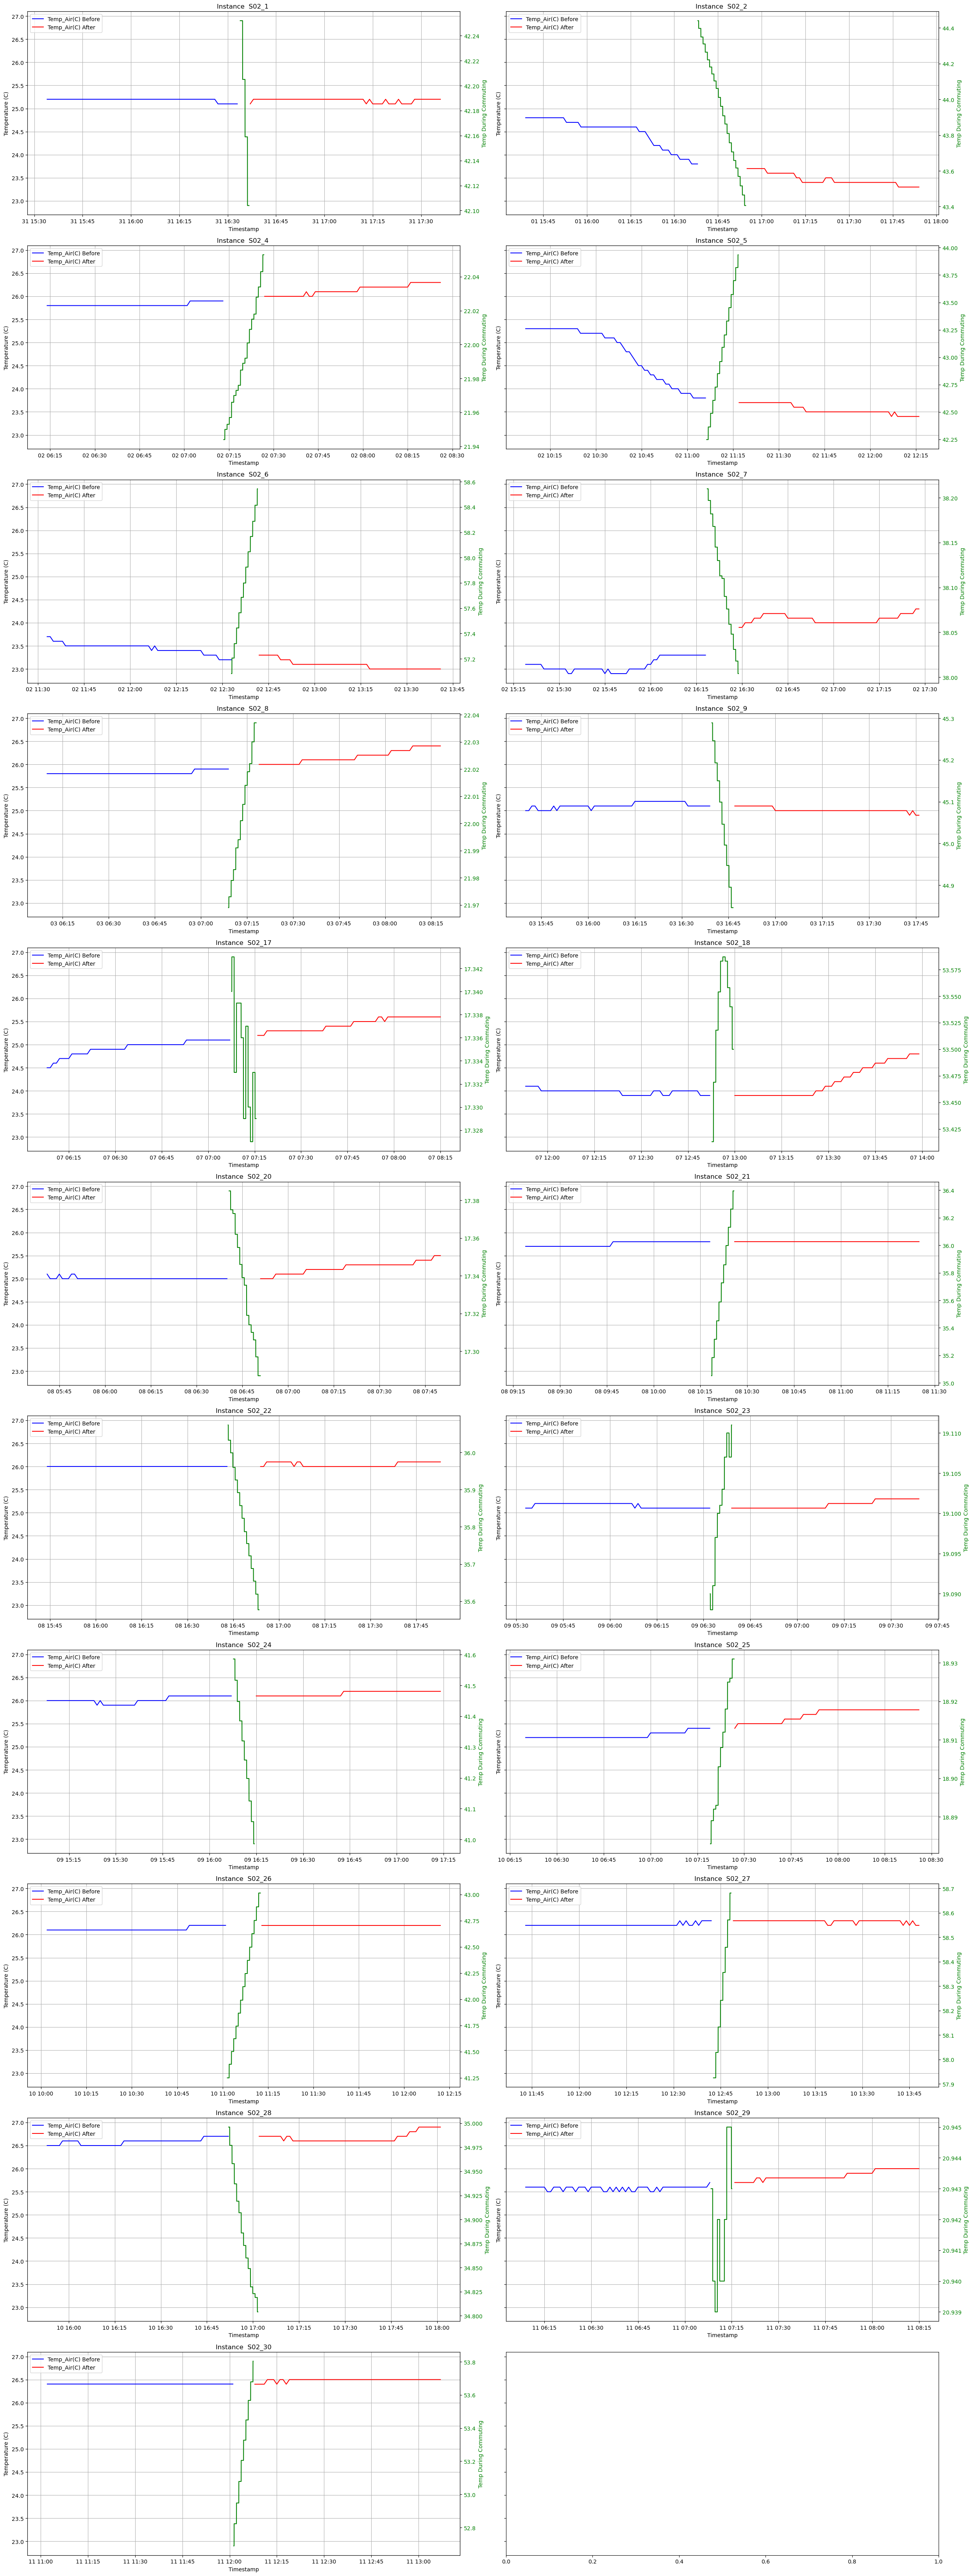

In [6]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV files
data_file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_b.csv'

data = pd.read_csv(data_file_path)
commuting_data = S02_df

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' columns to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
commuting_data['Timestamp'] = pd.to_datetime(commuting_data['DateTime'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": " S02_1 ", "Start Time": "2023-07-31 16:33:54", "End Time": "2023-07-31 16:36:38"},
    {"ID_instance": " S02_2 ", "Start Time": "2023-08-01 16:38:07", "End Time": "2023-08-01 16:54:32"},
    {"ID_instance": " S02_4 ", "Start Time": "2023-08-02 07:13:16", "End Time": "2023-08-02 07:26:44"},
    {"ID_instance": " S02_5 ", "Start Time": "2023-08-02 11:06:22", "End Time": "2023-08-02 11:16:42"},
    {"ID_instance": " S02_6 ", "Start Time": "2023-08-02 12:33:00", "End Time": "2023-08-02 12:41:28"},
    {"ID_instance": " S02_7 ", "Start Time": "2023-08-02 16:18:34", "End Time": "2023-08-02 16:28:48"},
    {"ID_instance": " S02_8 ", "Start Time": "2023-08-03 07:09:01", "End Time": "2023-08-03 07:18:02"},
    {"ID_instance": " S02_9 ", "Start Time": "2023-08-03 16:39:40", "End Time": "2023-08-03 16:46:27"},
    {"ID_instance": " S02_17", "Start Time": "2023-08-07 07:07:35", "End Time": "2023-08-07 07:15:30"},
    {"ID_instance": " S02_18", "Start Time": "2023-08-07 12:52:42", "End Time": "2023-08-07 12:59:34"},
    {"ID_instance": " S02_20", "Start Time": "2023-08-08 06:40:41", "End Time": "2023-08-08 06:50:55"},
    {"ID_instance": " S02_21", "Start Time": "2023-08-08 10:18:33", "End Time": "2023-08-08 10:25:43"},
    {"ID_instance": " S02_22", "Start Time": "2023-08-08 16:43:22", "End Time": "2023-08-08 16:53:31"},
    {"ID_instance": " S02_23", "Start Time": "2023-08-09 06:32:09", "End Time": "2023-08-09 06:39:00"},
    {"ID_instance": " S02_24", "Start Time": "2023-08-09 16:07:41", "End Time": "2023-08-09 16:14:22"},
    {"ID_instance": " S02_25", "Start Time": "2023-08-10 07:19:12", "End Time": "2023-08-10 07:26:47"},
    {"ID_instance": " S02_26", "Start Time": "2023-08-10 11:01:34", "End Time": "2023-08-10 11:12:30"},
    {"ID_instance": " S02_27", "Start Time": "2023-08-10 12:42:41", "End Time": "2023-08-10 12:48:16"},
    {"ID_instance": " S02_28", "Start Time": "2023-08-10 16:52:05", "End Time": "2023-08-10 17:01:36"},
    {"ID_instance": " S02_29", "Start Time": "2023-08-11 07:08:23", "End Time": "2023-08-11 07:15:03"},
    {"ID_instance": " S02_30", "Start Time": "2023-08-11 12:01:19", "End Time": "2023-08-11 12:07:27"}
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Function to plot temperature data before, during, and after for each instance, creating a subplot matrix
def plot_temperatures_full(commuting_instances, data, commuting_data):
    num_instances = len(commuting_instances)
    nrows = (num_instances + 1) // 2  # Number of rows for the subplot matrix

    fig, axes = plt.subplots(nrows, 2, figsize=(25, nrows * 6), sharex=False, sharey=True)
    axes = axes.flatten()

    for idx, instance in enumerate(commuting_instances):
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before, during, and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        during_data = commuting_data[(commuting_data['Timestamp'] >= start_time) & (commuting_data['Timestamp'] <= end_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Plot the data
        ax = axes[idx]
        ax.plot(before_data['Timestamp'], before_data['Temp_Air(C)'], label='Temp_Air(C) Before', color='blue')
        ax.plot(after_data['Timestamp'], after_data['Temp_Air(C)'], label='Temp_Air(C) After', color='red')

        # Create another y-axis for during commuting data
        ax2 = ax.twinx()
        ax2.plot(during_data['Timestamp'], during_data['Temp(C)_N1'], label='Temp_Air(C) During', color='green')
        ax2.set_ylabel('Temp During Commuting', color='green')
        ax2.tick_params(axis='y', labelcolor='green')

        ax.set_title(f'Instance {instance_id}')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Temperature (C)')
        ax.legend(loc='upper left')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Visualize the temperature data for each commuting instance, including during commuting
plot_temperatures_full(commuting_instances, data, commuting_data)


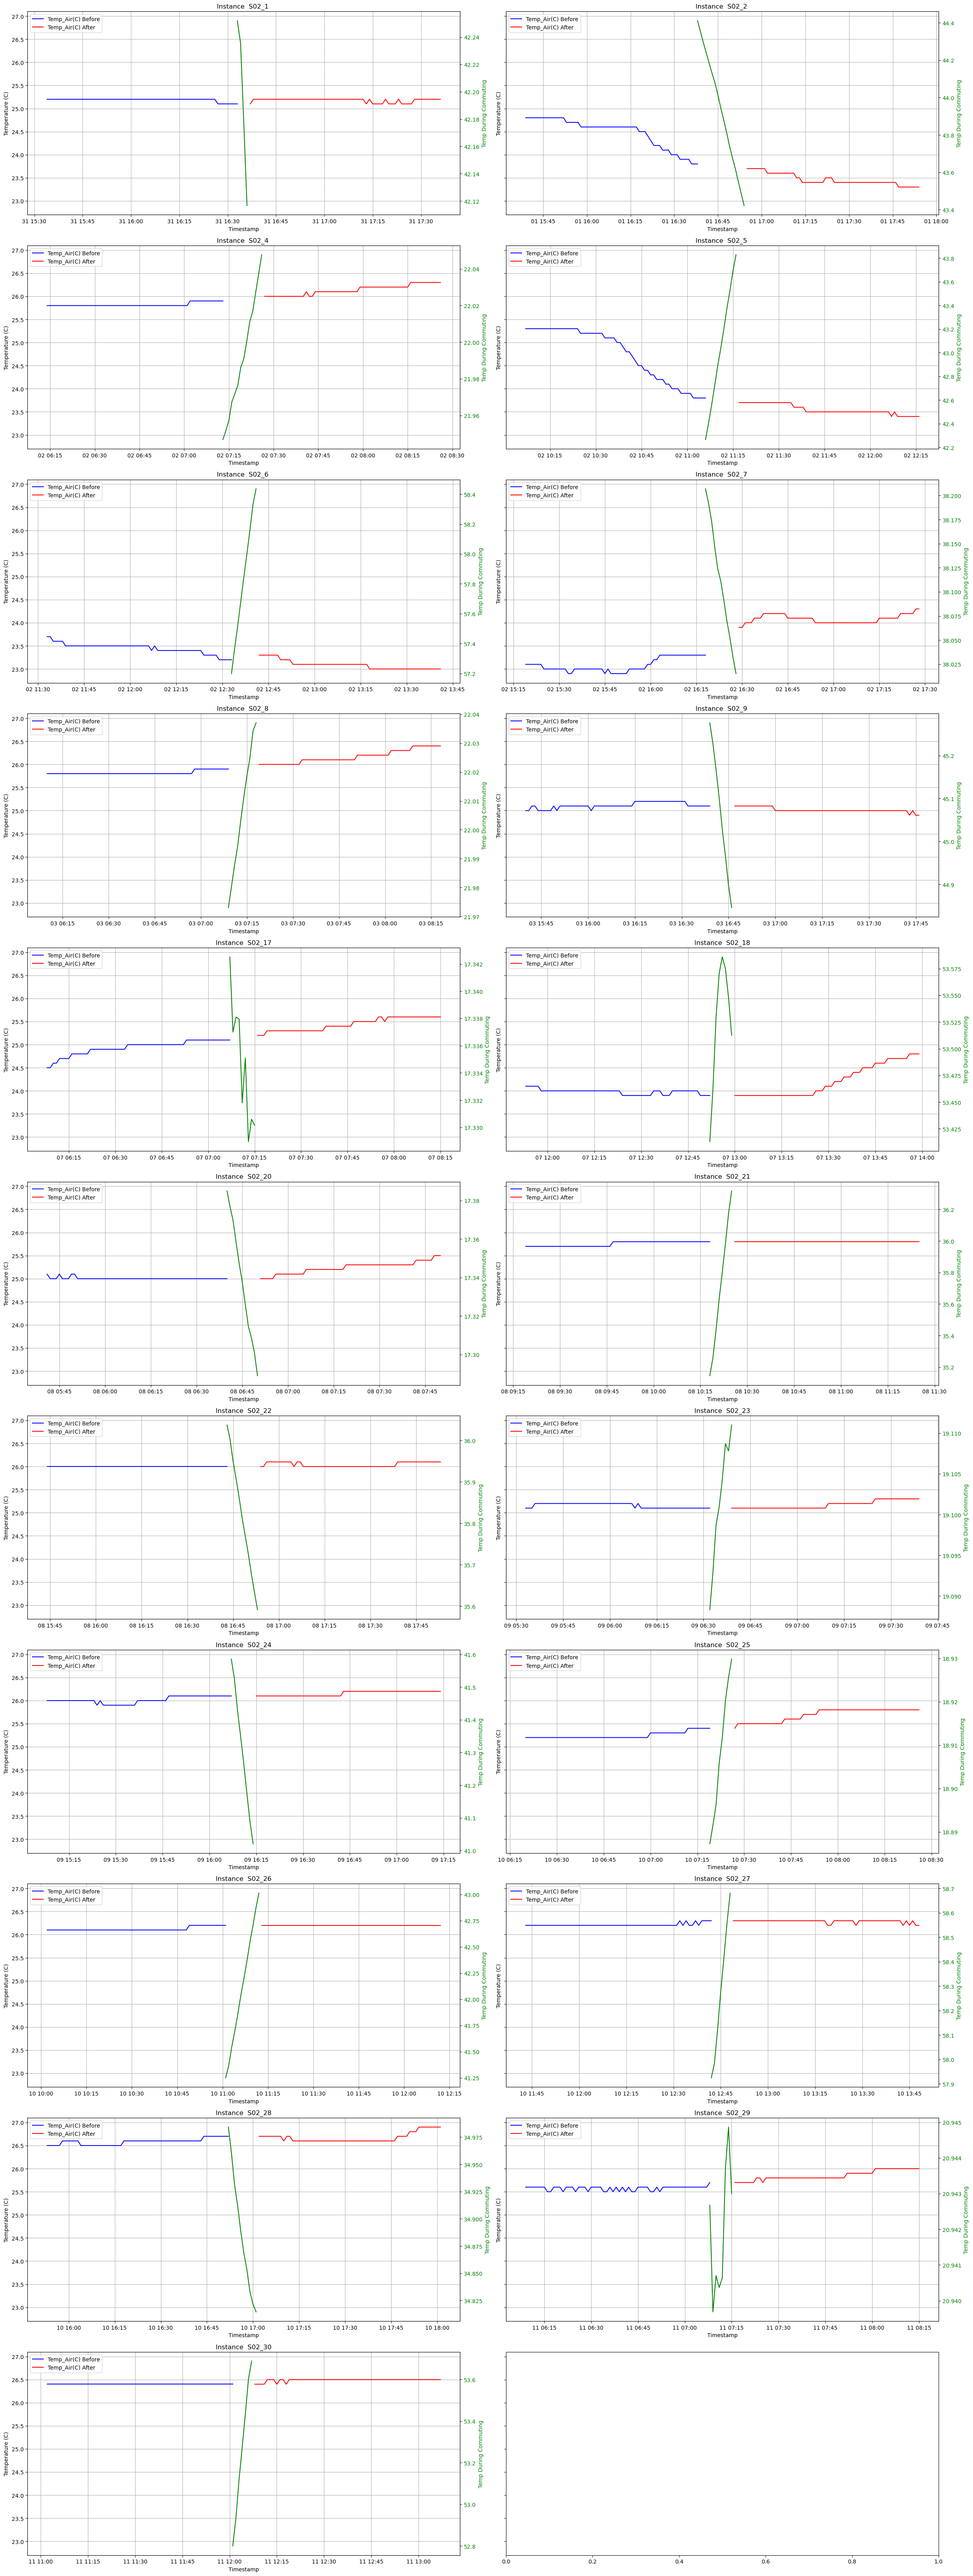

In [7]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV files
data_file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_b.csv'

data = pd.read_csv(data_file_path)
commuting_data = S02_df

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' columns to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
commuting_data['Timestamp'] = pd.to_datetime(commuting_data['DateTime'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": " S02_1 ", "Start Time": "2023-07-31 16:33:54", "End Time": "2023-07-31 16:36:38"},
    {"ID_instance": " S02_2 ", "Start Time": "2023-08-01 16:38:07", "End Time": "2023-08-01 16:54:32"},
    {"ID_instance": " S02_4 ", "Start Time": "2023-08-02 07:13:16", "End Time": "2023-08-02 07:26:44"},
    {"ID_instance": " S02_5 ", "Start Time": "2023-08-02 11:06:22", "End Time": "2023-08-02 11:16:42"},
    {"ID_instance": " S02_6 ", "Start Time": "2023-08-02 12:33:00", "End Time": "2023-08-02 12:41:28"},
    {"ID_instance": " S02_7 ", "Start Time": "2023-08-02 16:18:34", "End Time": "2023-08-02 16:28:48"},
    {"ID_instance": " S02_8 ", "Start Time": "2023-08-03 07:09:01", "End Time": "2023-08-03 07:18:02"},
    {"ID_instance": " S02_9 ", "Start Time": "2023-08-03 16:39:40", "End Time": "2023-08-03 16:46:27"},
    {"ID_instance": " S02_17", "Start Time": "2023-08-07 07:07:35", "End Time": "2023-08-07 07:15:30"},
    {"ID_instance": " S02_18", "Start Time": "2023-08-07 12:52:42", "End Time": "2023-08-07 12:59:34"},
    {"ID_instance": " S02_20", "Start Time": "2023-08-08 06:40:41", "End Time": "2023-08-08 06:50:55"},
    {"ID_instance": " S02_21", "Start Time": "2023-08-08 10:18:33", "End Time": "2023-08-08 10:25:43"},
    {"ID_instance": " S02_22", "Start Time": "2023-08-08 16:43:22", "End Time": "2023-08-08 16:53:31"},
    {"ID_instance": " S02_23", "Start Time": "2023-08-09 06:32:09", "End Time": "2023-08-09 06:39:00"},
    {"ID_instance": " S02_24", "Start Time": "2023-08-09 16:07:41", "End Time": "2023-08-09 16:14:22"},
    {"ID_instance": " S02_25", "Start Time": "2023-08-10 07:19:12", "End Time": "2023-08-10 07:26:47"},
    {"ID_instance": " S02_26", "Start Time": "2023-08-10 11:01:34", "End Time": "2023-08-10 11:12:30"},
    {"ID_instance": " S02_27", "Start Time": "2023-08-10 12:42:41", "End Time": "2023-08-10 12:48:16"},
    {"ID_instance": " S02_28", "Start Time": "2023-08-10 16:52:05", "End Time": "2023-08-10 17:01:36"},
    {"ID_instance": " S02_29", "Start Time": "2023-08-11 07:08:23", "End Time": "2023-08-11 07:15:03"},
    {"ID_instance": " S02_30", "Start Time": "2023-08-11 12:01:19", "End Time": "2023-08-11 12:07:27"}
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Function to plot temperature data before, during, and after for each instance, creating a subplot matrix
def plot_temperatures_full(commuting_instances, data, commuting_data):
    num_instances = len(commuting_instances)
    nrows = (num_instances + 1) // 2  # Number of rows for the subplot matrix

    fig, axes = plt.subplots(nrows, 2, figsize=(25, nrows * 6), sharex=False, sharey=True)
    axes = axes.flatten()

    for idx, instance in enumerate(commuting_instances):
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before, during, and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        during_data = commuting_data[(commuting_data['Timestamp'] >= start_time) & (commuting_data['Timestamp'] <= end_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Resample to make smoother curves
        before_data = before_data[['Timestamp', 'Temp_Air(C)']].resample('min', on='Timestamp').mean().interpolate()
        during_data = during_data[['Timestamp', 'Temp(C)_N1']].resample('min', on='Timestamp').mean().interpolate()
        after_data = after_data[['Timestamp', 'Temp_Air(C)']].resample('min', on='Timestamp').mean().interpolate()

        # Plot the data
        ax = axes[idx]
        ax.plot(before_data.index, before_data['Temp_Air(C)'], label='Temp_Air(C) Before', color='blue')
        ax.plot(after_data.index, after_data['Temp_Air(C)'], label='Temp_Air(C) After', color='red')

        # Create another y-axis for during commuting data
        ax2 = ax.twinx()
        ax2.plot(during_data.index, during_data['Temp(C)_N1'], label='Temp_Air(C) During', color='green')
        ax2.set_ylabel('Temp During Commuting', color='green')
        ax2.tick_params(axis='y', labelcolor='green')

        ax.set_title(f'Instance {instance_id}')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Temperature (C)')
        ax.legend(loc='upper left')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Visualize the temperature data for each commuting instance, including during commuting
plot_temperatures_full(commuting_instances, data, commuting_data)


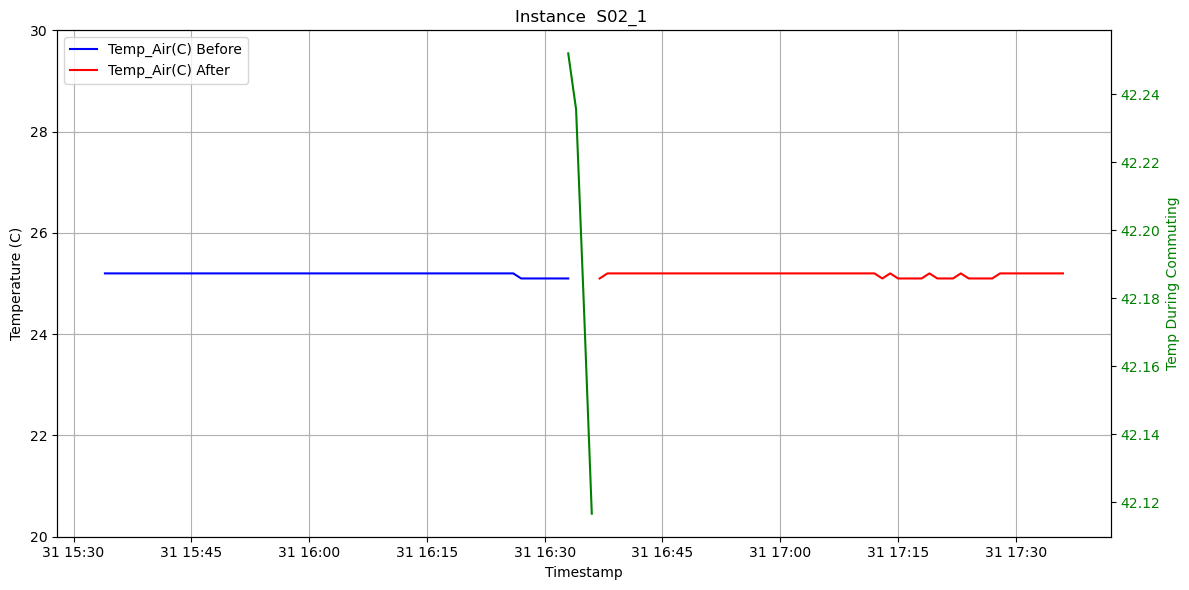

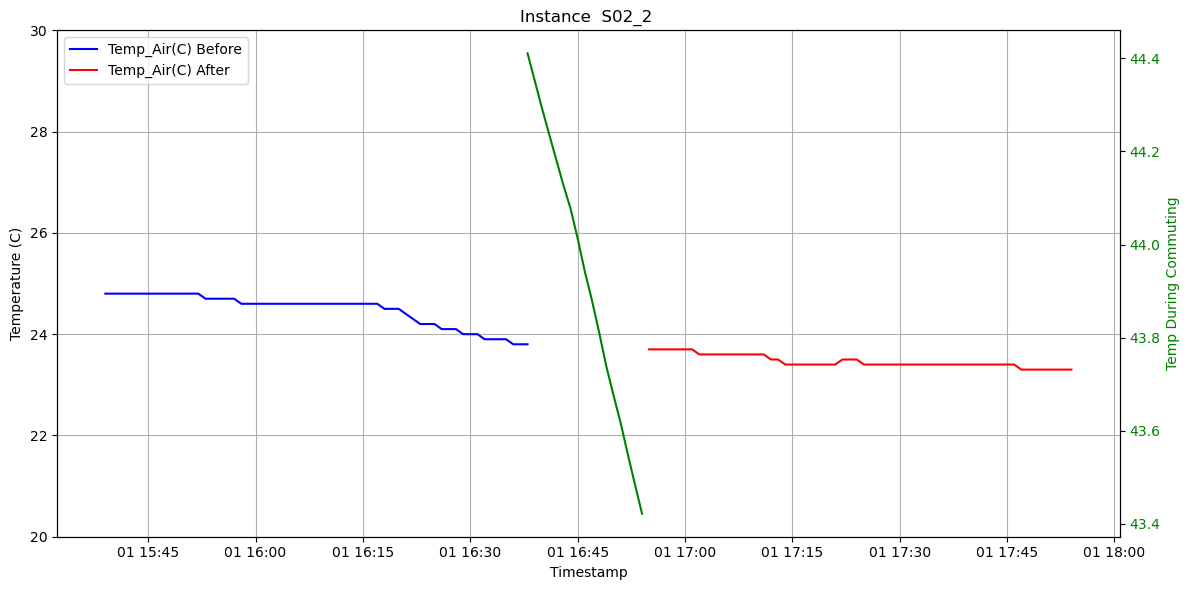

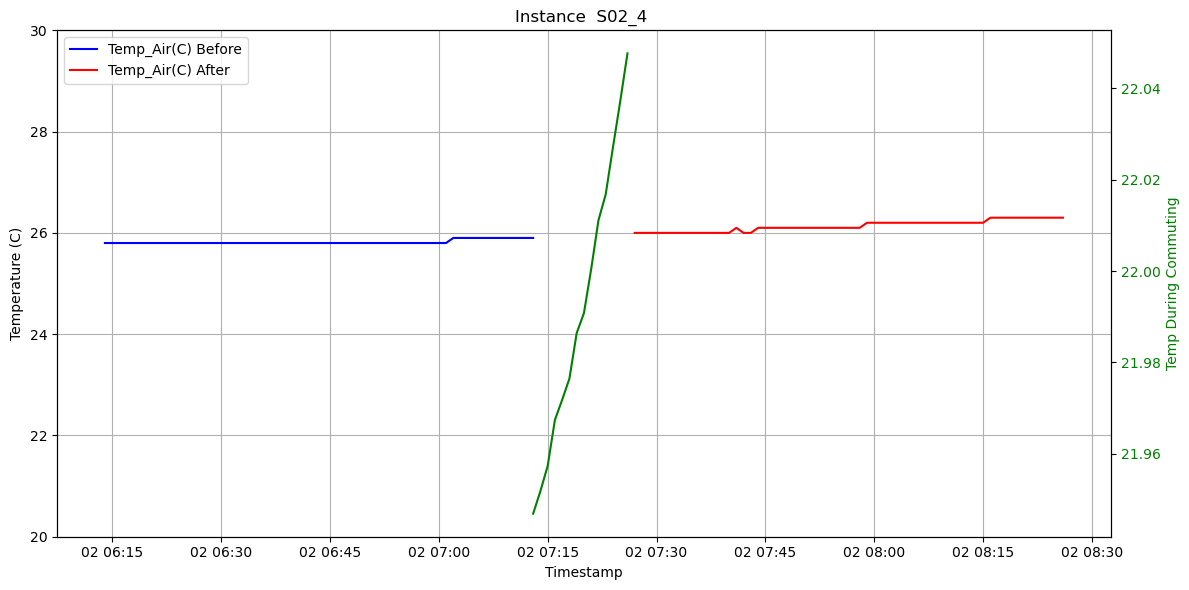

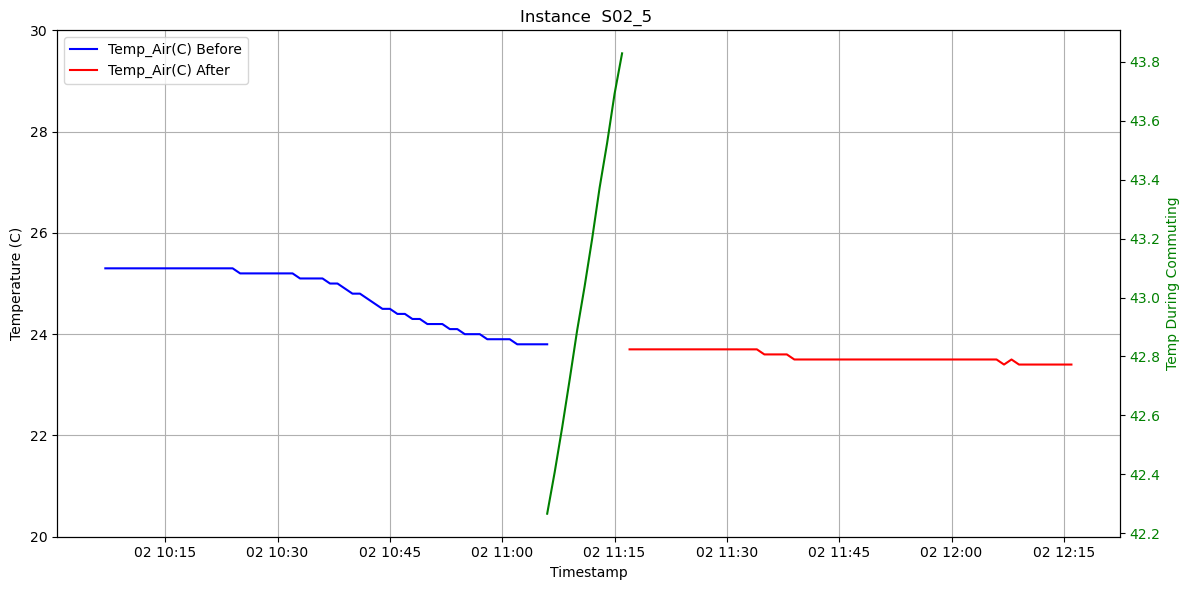

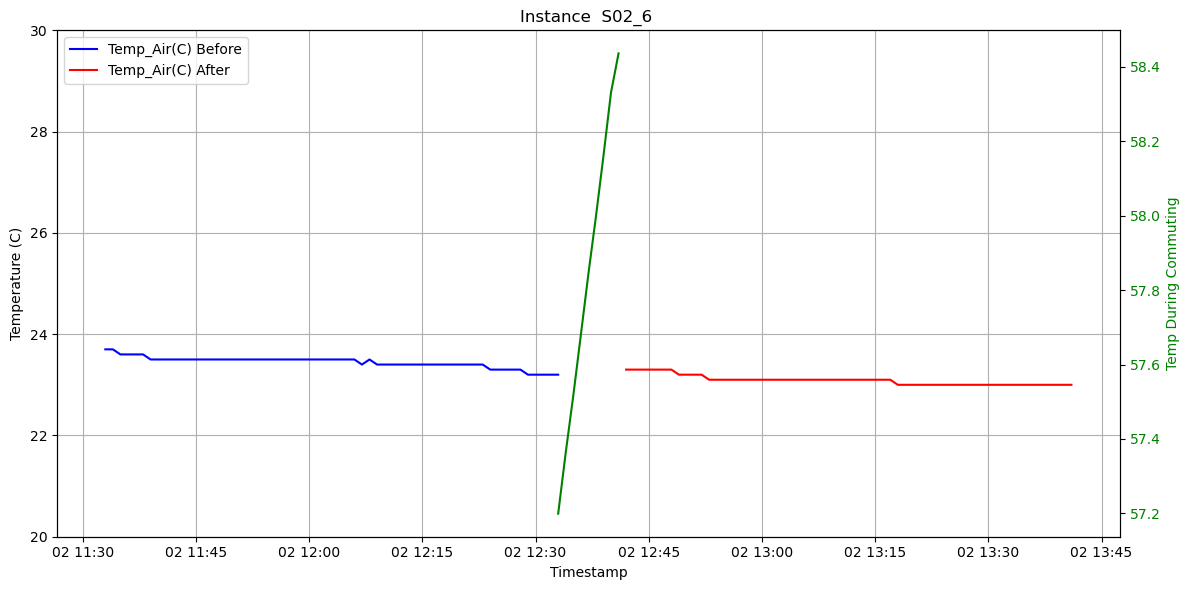

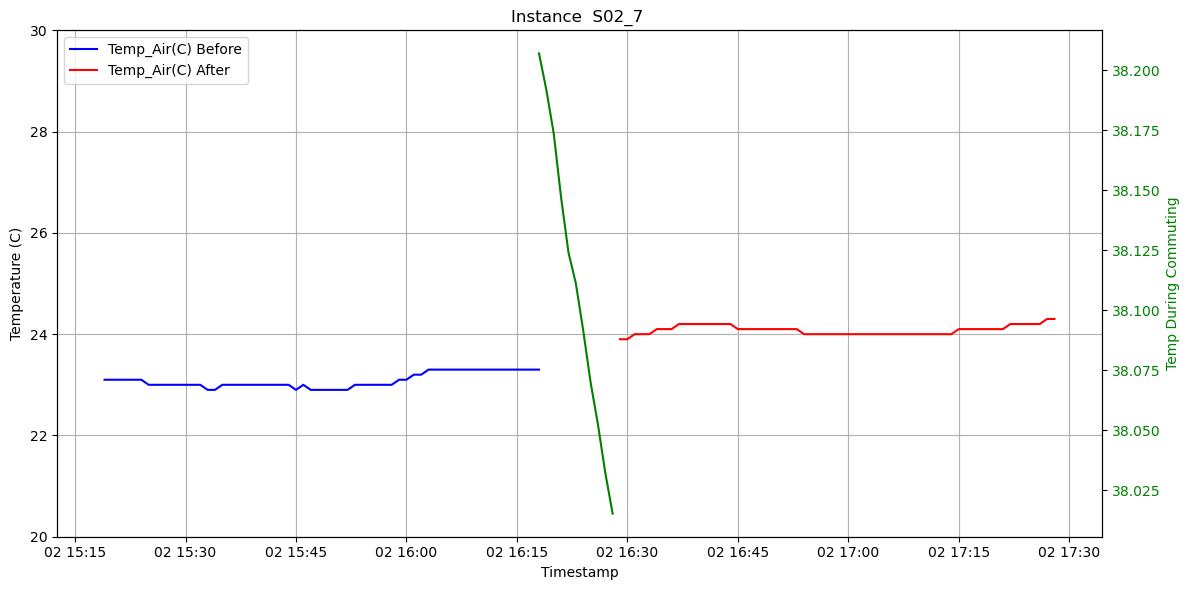

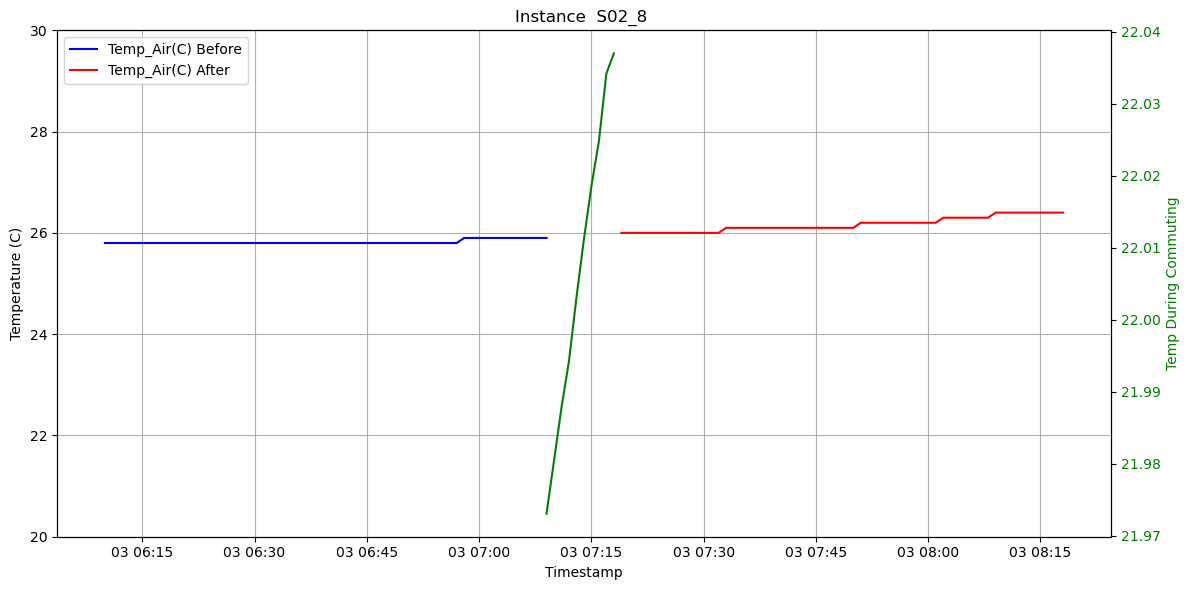

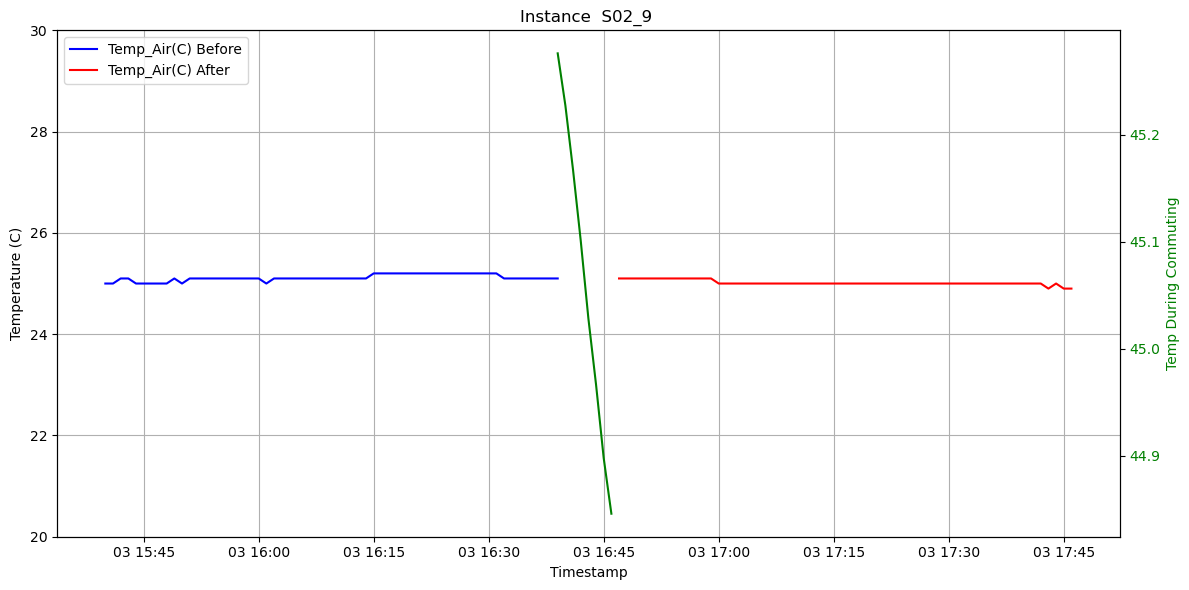

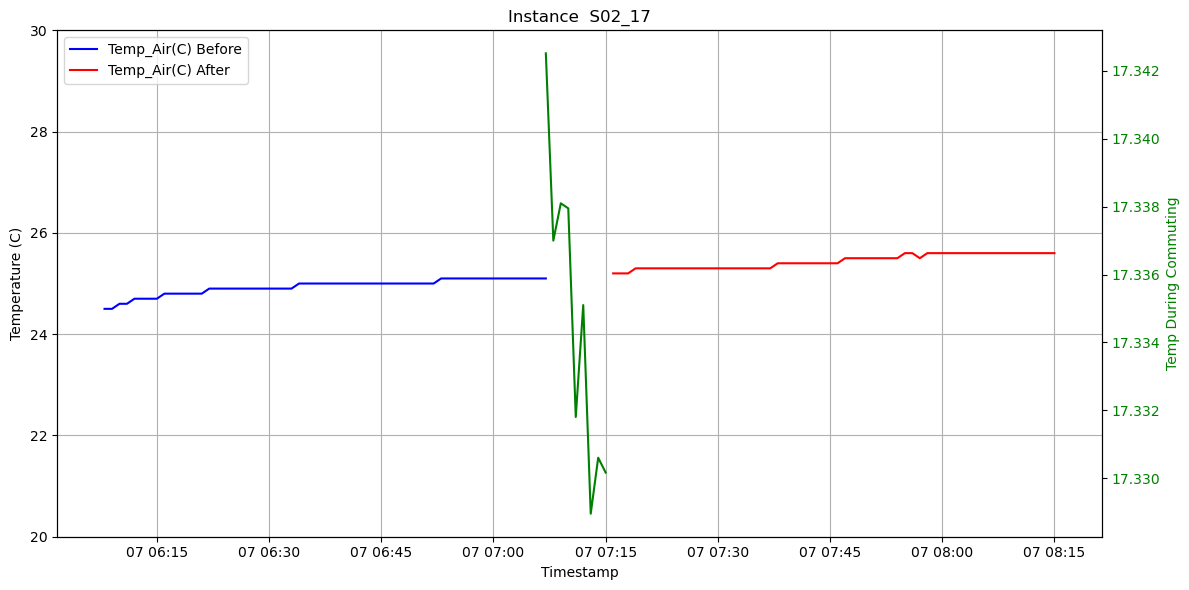

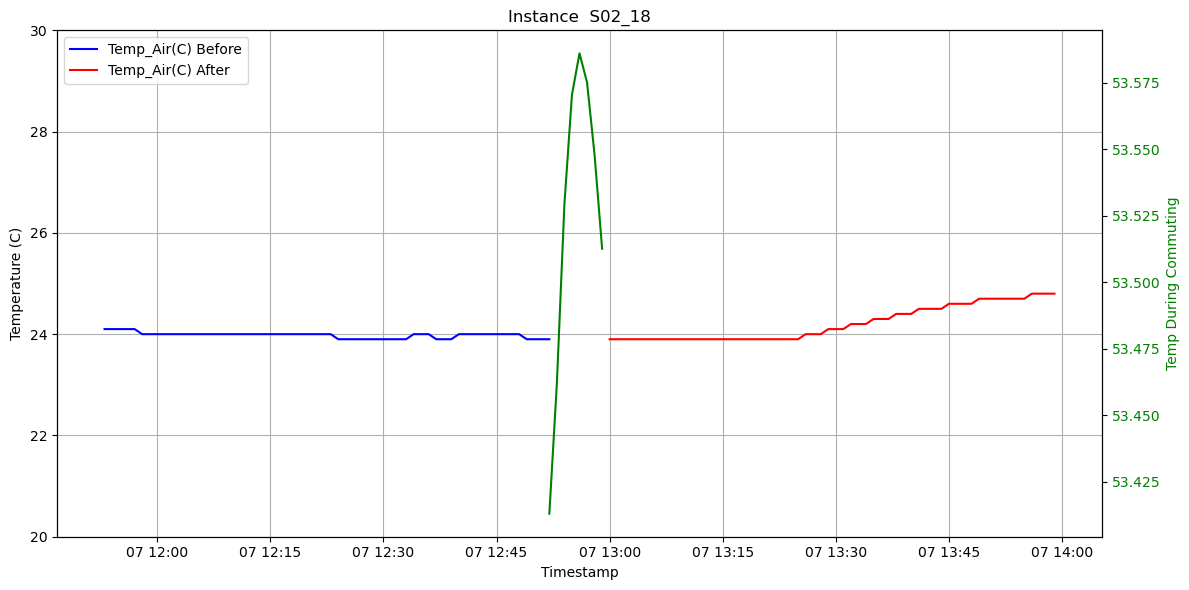

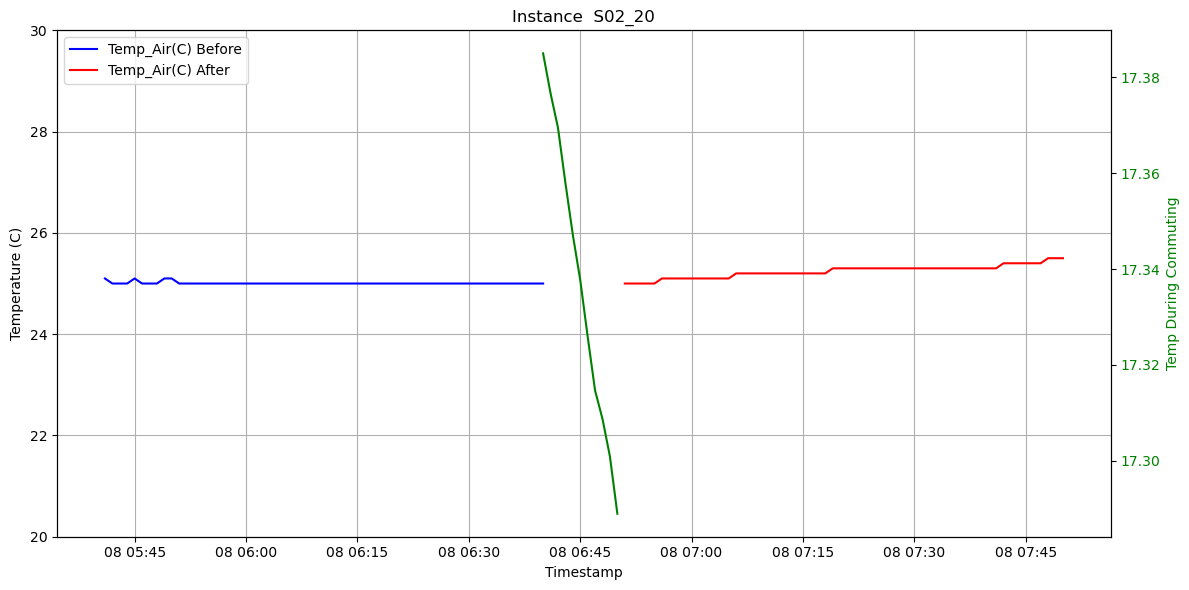

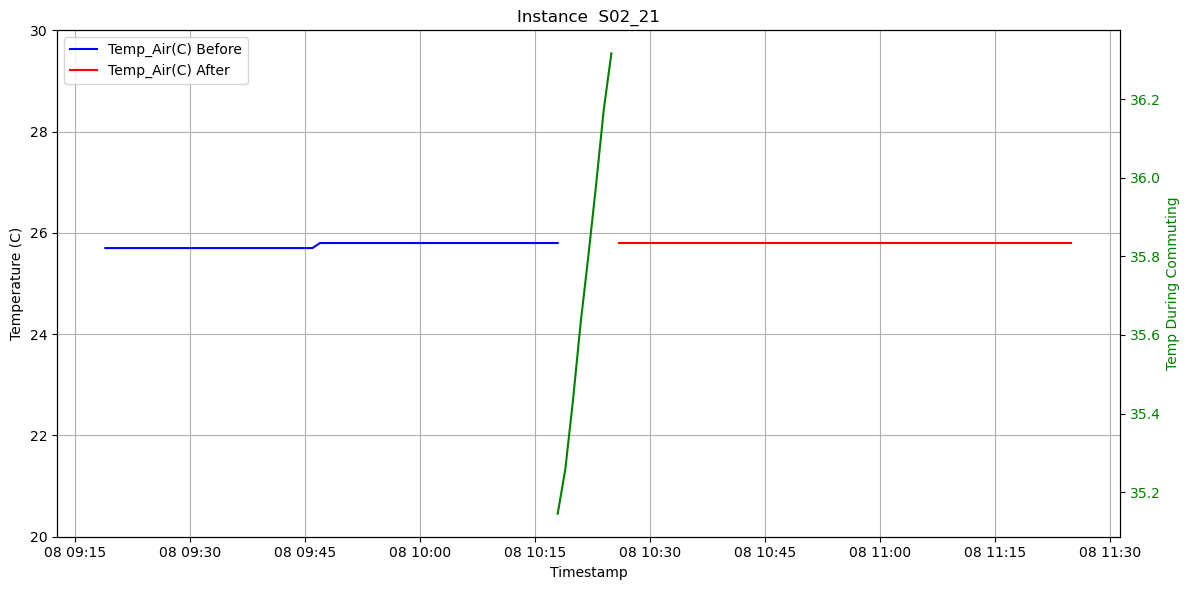

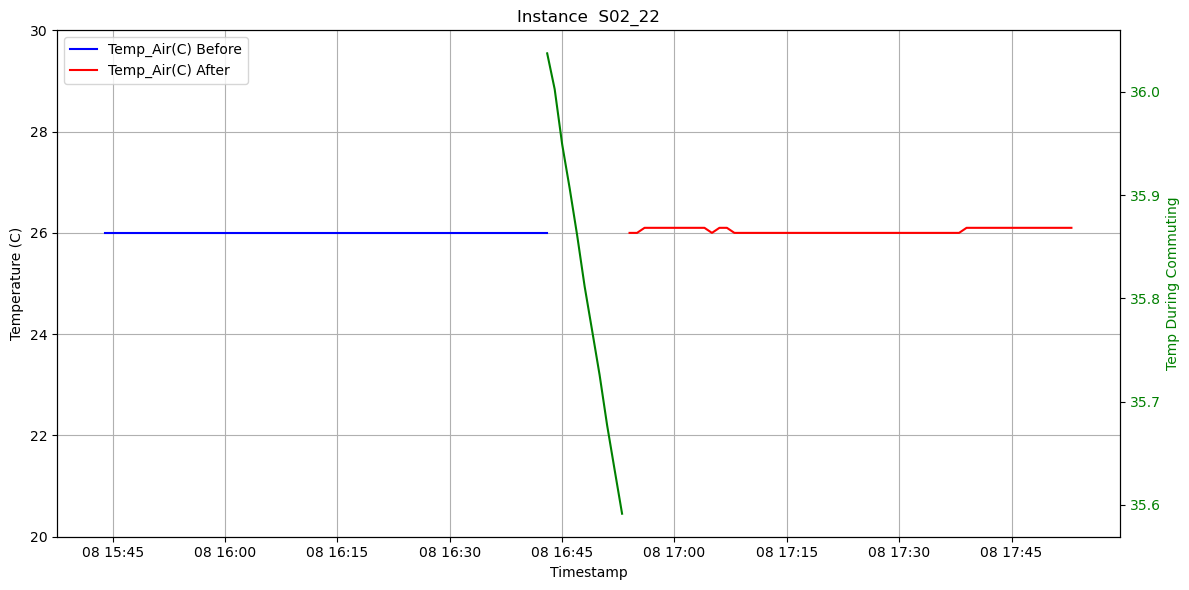

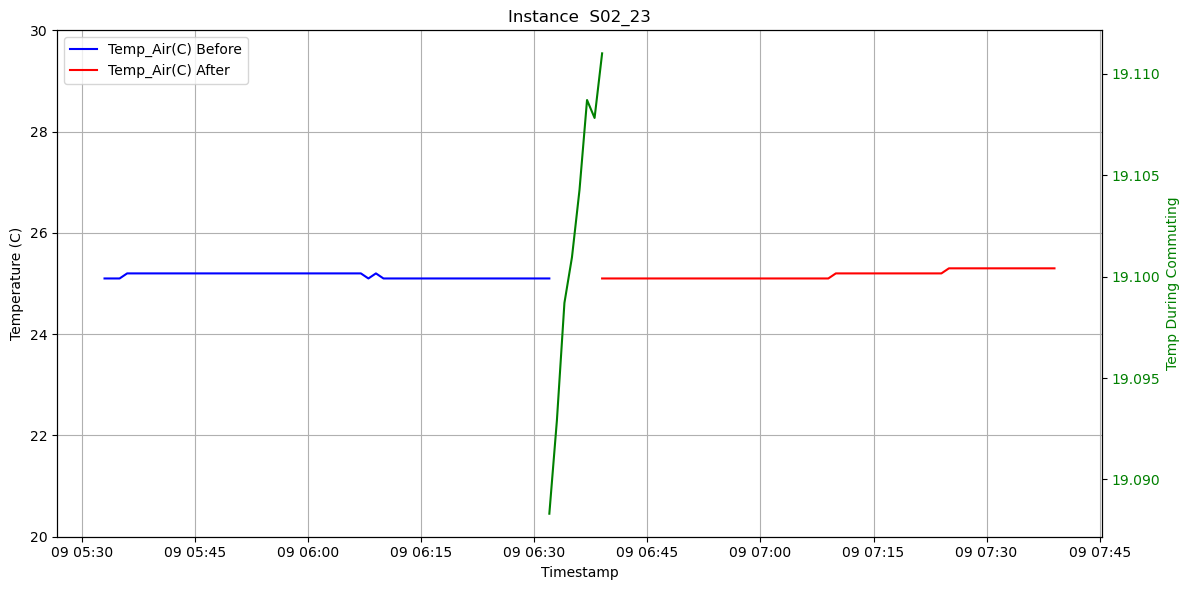

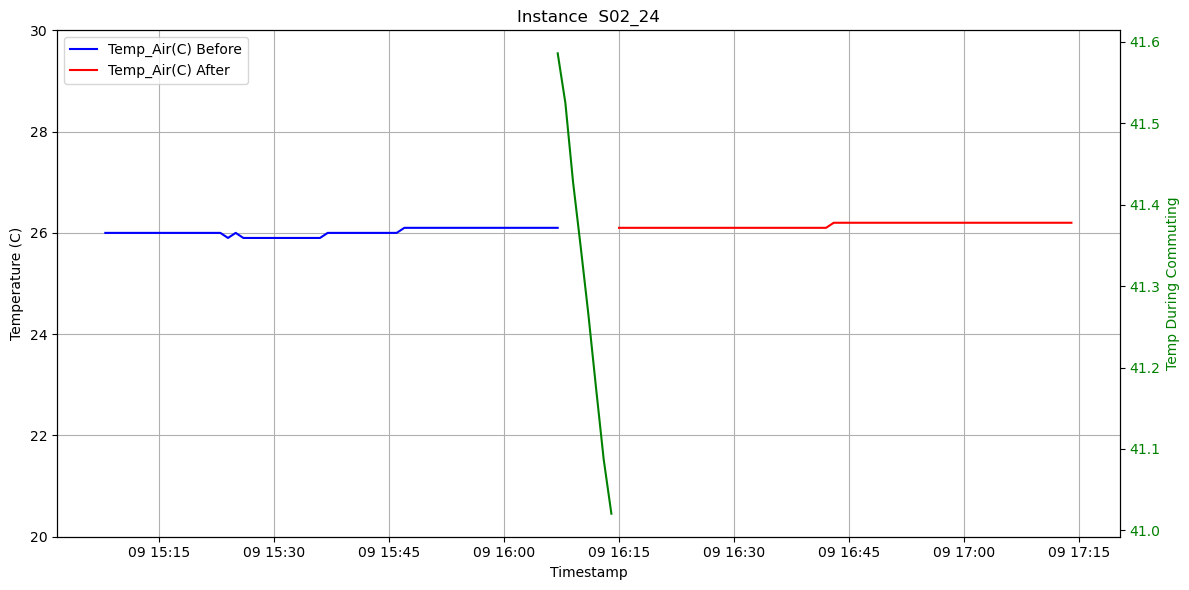

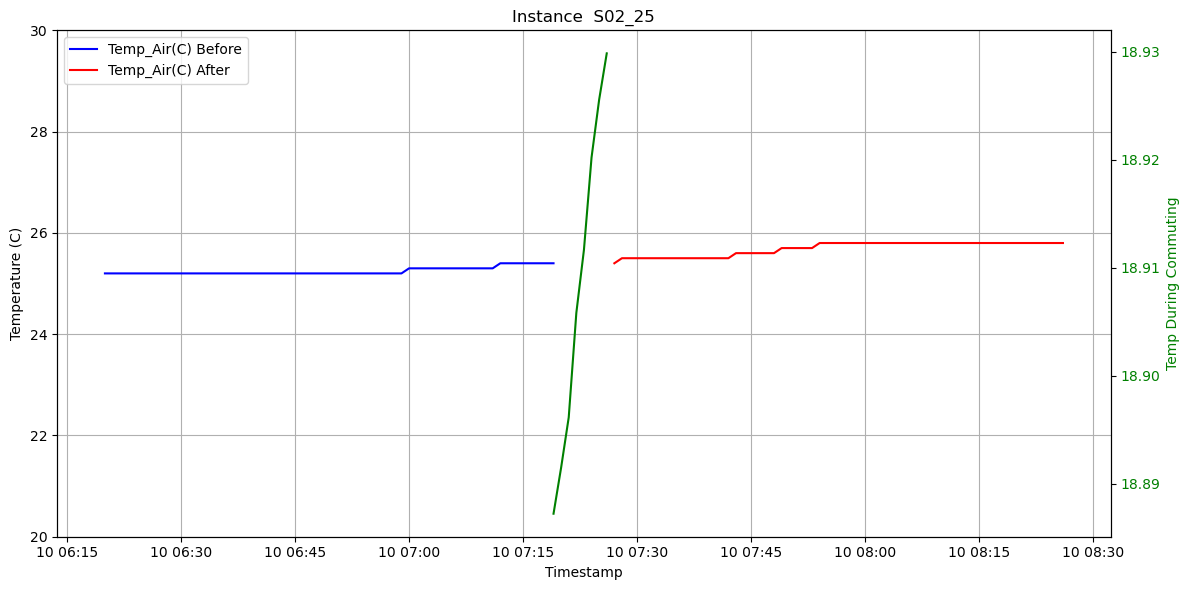

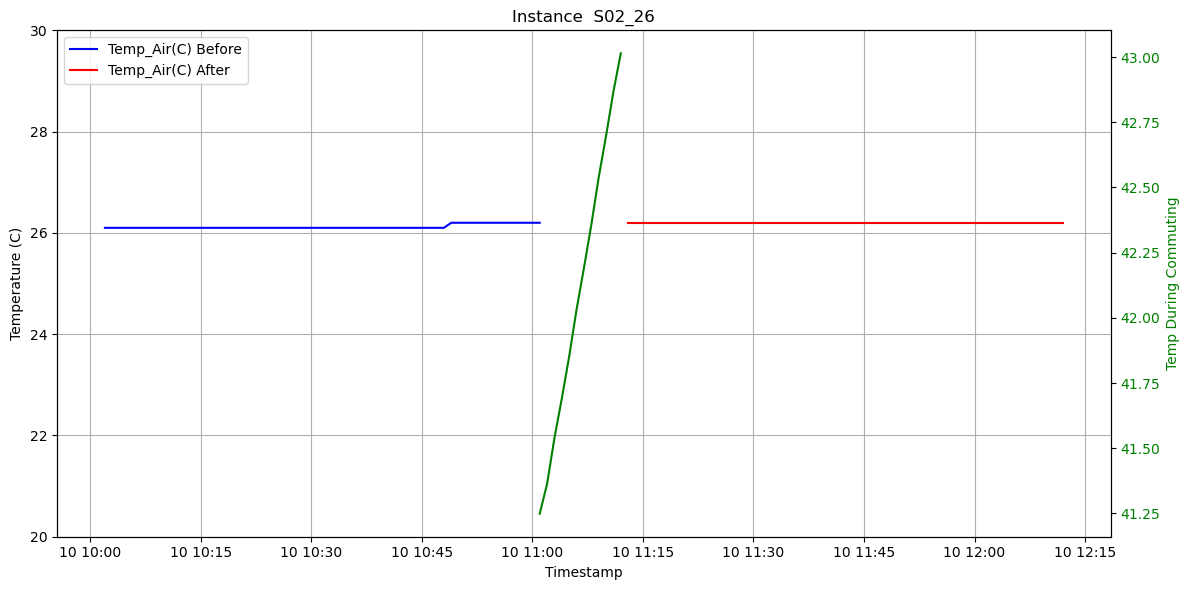

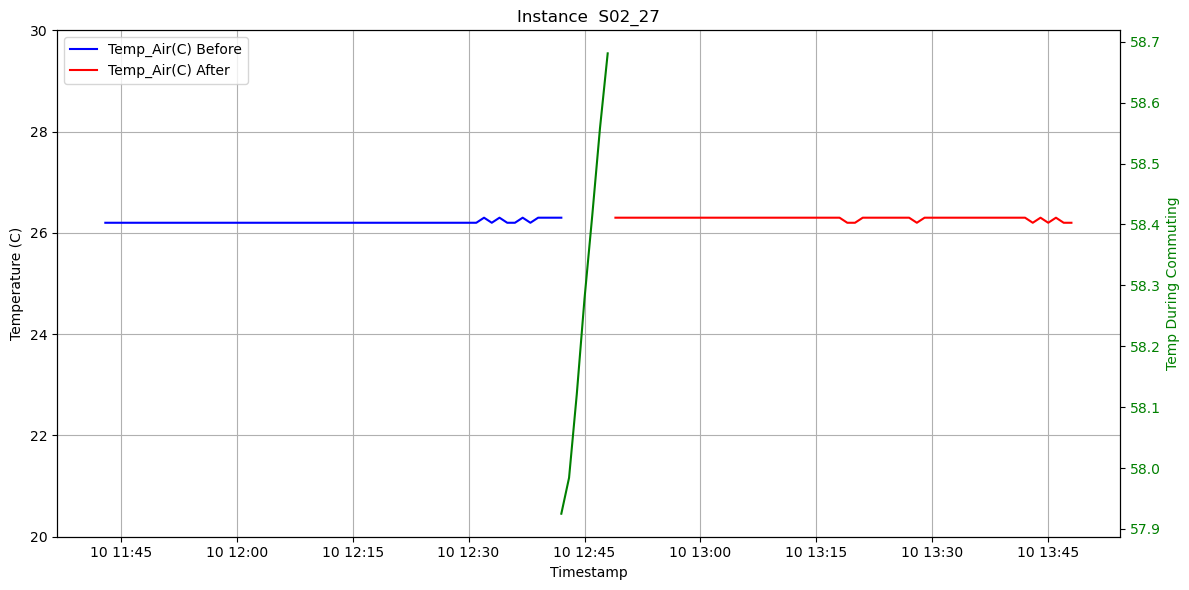

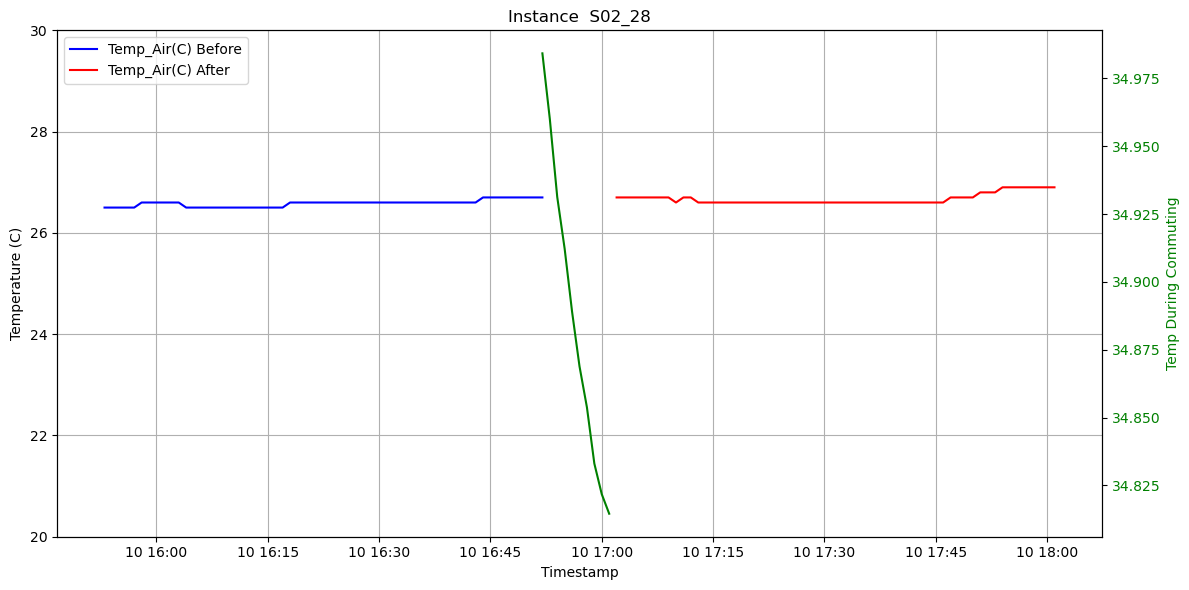

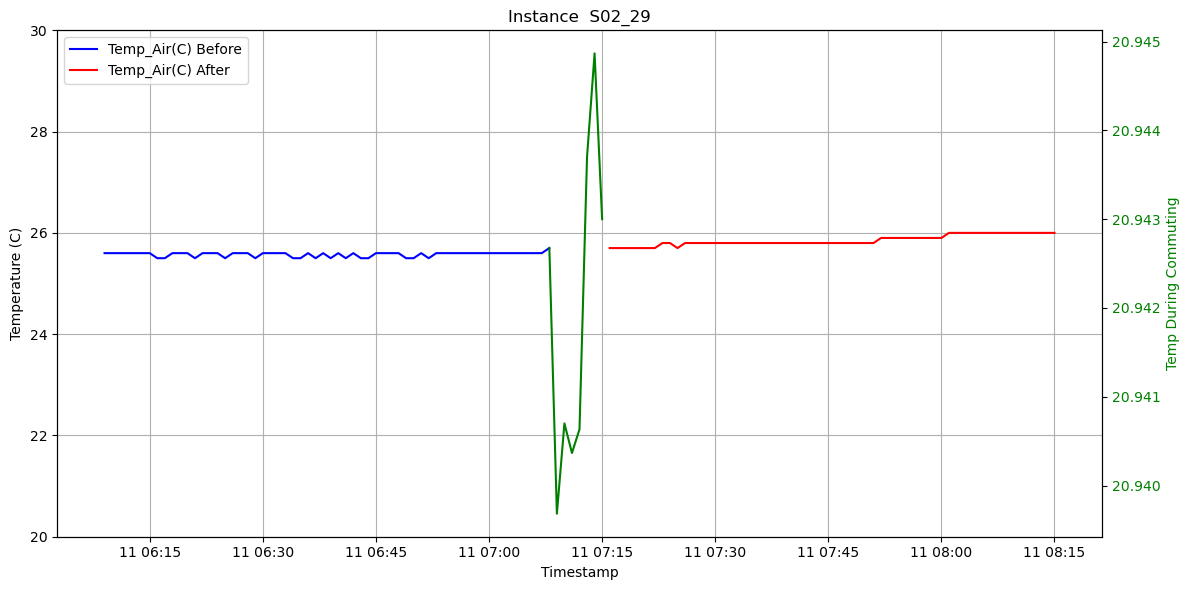

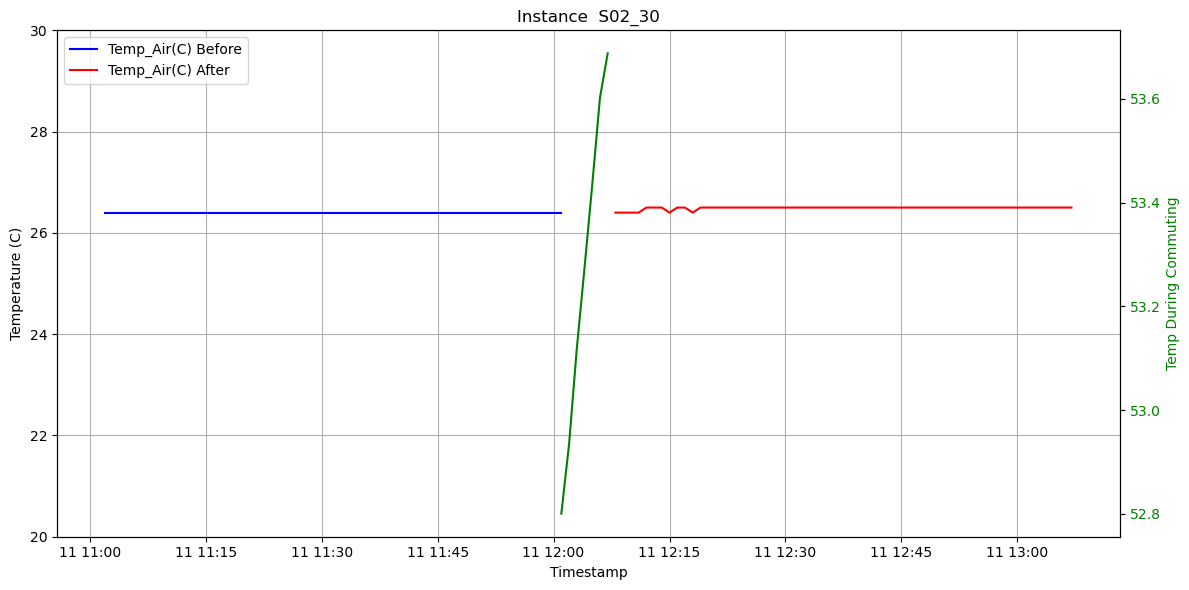

In [8]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV files
data_file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_b.csv'

data = pd.read_csv(data_file_path)
commuting_data = S02_df

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' columns to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
commuting_data['Timestamp'] = pd.to_datetime(commuting_data['DateTime'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": " S02_1 ", "Start Time": "2023-07-31 16:33:54", "End Time": "2023-07-31 16:36:38"},
    {"ID_instance": " S02_2 ", "Start Time": "2023-08-01 16:38:07", "End Time": "2023-08-01 16:54:32"},
    {"ID_instance": " S02_4 ", "Start Time": "2023-08-02 07:13:16", "End Time": "2023-08-02 07:26:44"},
    {"ID_instance": " S02_5 ", "Start Time": "2023-08-02 11:06:22", "End Time": "2023-08-02 11:16:42"},
    {"ID_instance": " S02_6 ", "Start Time": "2023-08-02 12:33:00", "End Time": "2023-08-02 12:41:28"},
    {"ID_instance": " S02_7 ", "Start Time": "2023-08-02 16:18:34", "End Time": "2023-08-02 16:28:48"},
    {"ID_instance": " S02_8 ", "Start Time": "2023-08-03 07:09:01", "End Time": "2023-08-03 07:18:02"},
    {"ID_instance": " S02_9 ", "Start Time": "2023-08-03 16:39:40", "End Time": "2023-08-03 16:46:27"},
    {"ID_instance": " S02_17", "Start Time": "2023-08-07 07:07:35", "End Time": "2023-08-07 07:15:30"},
    {"ID_instance": " S02_18", "Start Time": "2023-08-07 12:52:42", "End Time": "2023-08-07 12:59:34"},
    {"ID_instance": " S02_20", "Start Time": "2023-08-08 06:40:41", "End Time": "2023-08-08 06:50:55"},
    {"ID_instance": " S02_21", "Start Time": "2023-08-08 10:18:33", "End Time": "2023-08-08 10:25:43"},
    {"ID_instance": " S02_22", "Start Time": "2023-08-08 16:43:22", "End Time": "2023-08-08 16:53:31"},
    {"ID_instance": " S02_23", "Start Time": "2023-08-09 06:32:09", "End Time": "2023-08-09 06:39:00"},
    {"ID_instance": " S02_24", "Start Time": "2023-08-09 16:07:41", "End Time": "2023-08-09 16:14:22"},
    {"ID_instance": " S02_25", "Start Time": "2023-08-10 07:19:12", "End Time": "2023-08-10 07:26:47"},
    {"ID_instance": " S02_26", "Start Time": "2023-08-10 11:01:34", "End Time": "2023-08-10 11:12:30"},
    {"ID_instance": " S02_27", "Start Time": "2023-08-10 12:42:41", "End Time": "2023-08-10 12:48:16"},
    {"ID_instance": " S02_28", "Start Time": "2023-08-10 16:52:05", "End Time": "2023-08-10 17:01:36"},
    {"ID_instance": " S02_29", "Start Time": "2023-08-11 07:08:23", "End Time": "2023-08-11 07:15:03"},
    {"ID_instance": " S02_30", "Start Time": "2023-08-11 12:01:19", "End Time": "2023-08-11 12:07:27"}
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Define y-axis limits for consistency
primary_y_axis_limits = (20, 30)

# Function to plot temperature data before, during, and after for each instance
def plot_temperatures_full(commuting_instances, data, commuting_data):
    for instance in commuting_instances:
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before, during, and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        during_data = commuting_data[(commuting_data['Timestamp'] >= start_time) & (commuting_data['Timestamp'] <= end_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Resample to make smoother curves
        before_data = before_data[['Timestamp', 'Temp_Air(C)']].resample('min', on='Timestamp').mean().interpolate()
        during_data = during_data[['Timestamp', 'Temp(C)_N1']].resample('min', on='Timestamp').mean().interpolate()
        after_data = after_data[['Timestamp', 'Temp_Air(C)']].resample('min', on='Timestamp').mean().interpolate()

        # Plot the data
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(before_data.index, before_data['Temp_Air(C)'], label='Temp_Air(C) Before', color='blue')
        ax.plot(after_data.index, after_data['Temp_Air(C)'], label='Temp_Air(C) After', color='red')

        # Create another y-axis for during commuting data
        ax2 = ax.twinx()
        ax2.plot(during_data.index, during_data['Temp(C)_N1'], label='Temp_Air(C) During', color='green')
        ax2.set_ylabel('Temp During Commuting', color='green')
        ax2.tick_params(axis='y', labelcolor='green')

        # Set consistent y-axis limits for the primary y-axis
        ax.set_ylim(primary_y_axis_limits)

        ax.set_title(f'Instance {instance_id}')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Temperature (C)')
        ax.legend(loc='upper left')
        ax.grid(True)

        plt.tight_layout()
        plt.show()

# Visualize the temperature data for each commuting instance, including during commuting
plot_temperatures_full(commuting_instances, data, commuting_data)


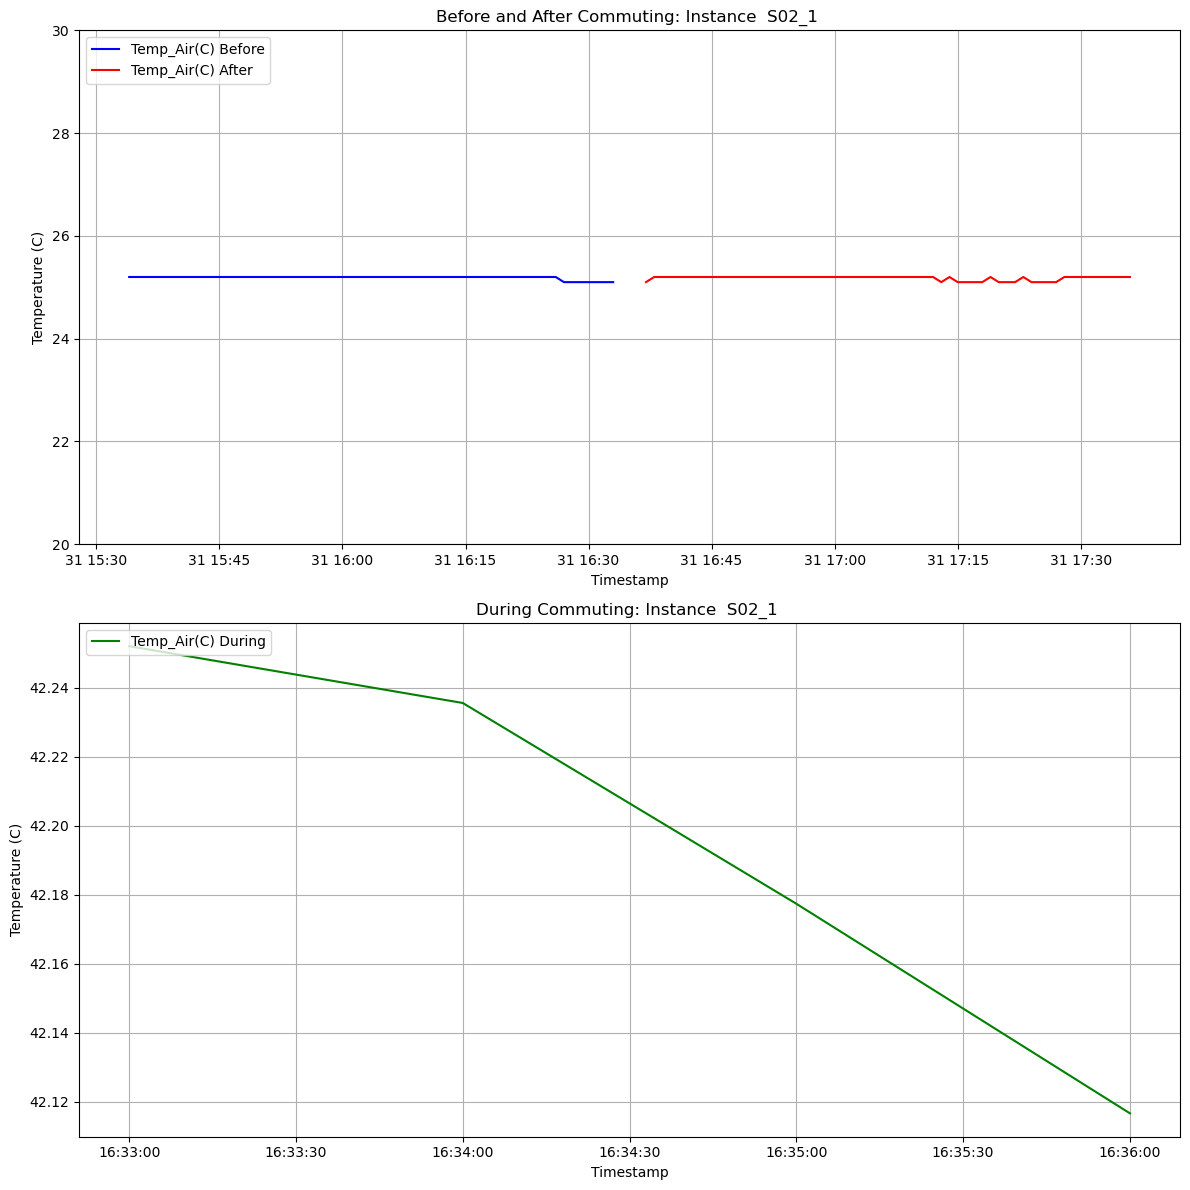

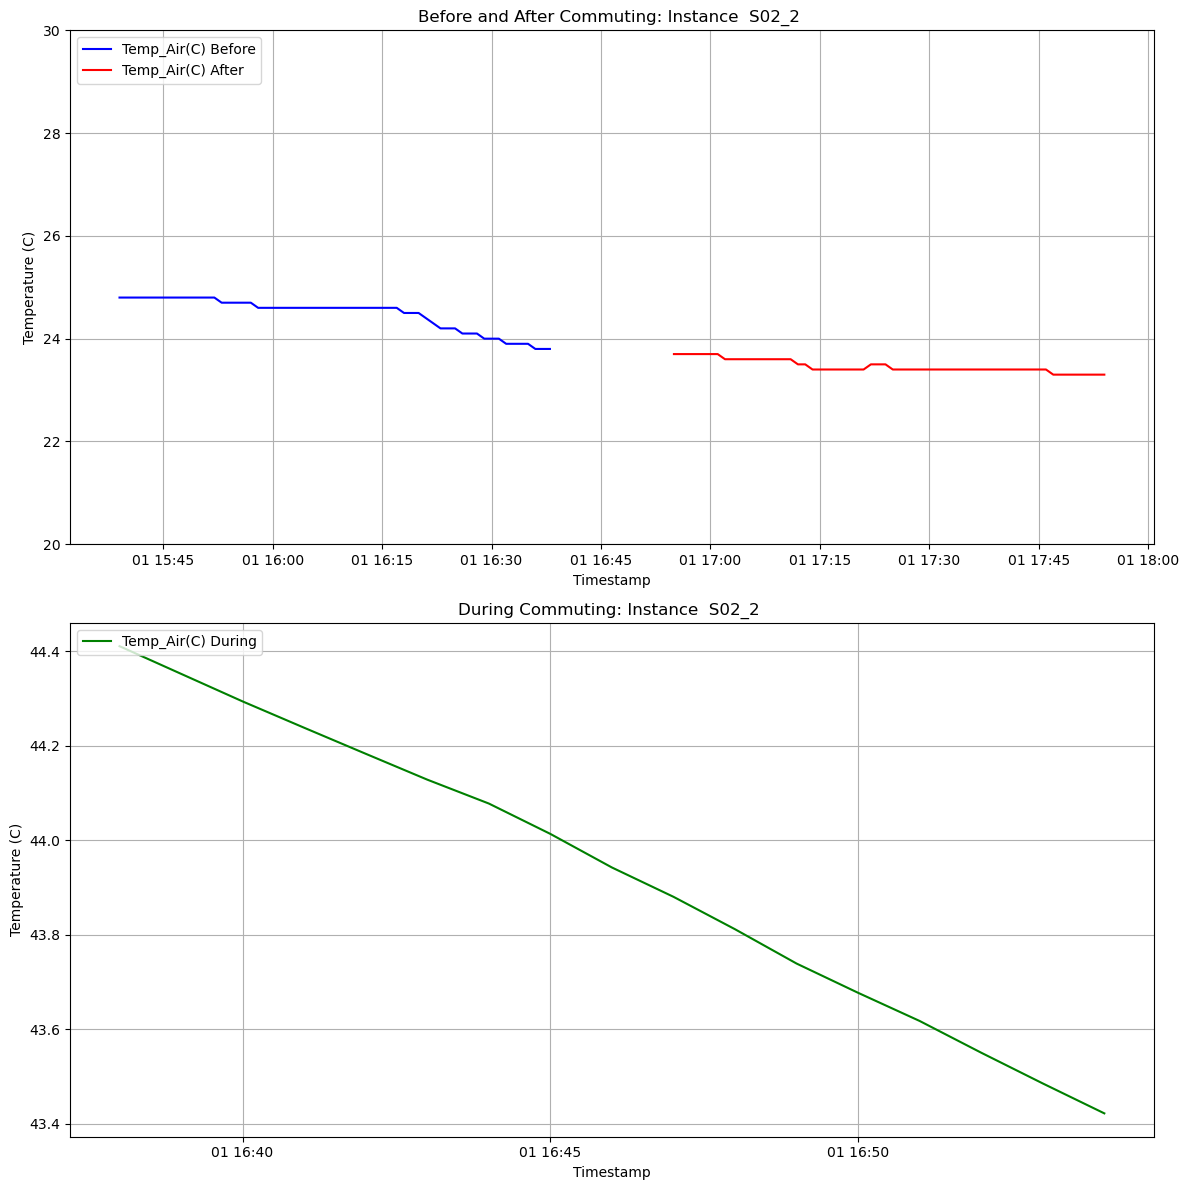

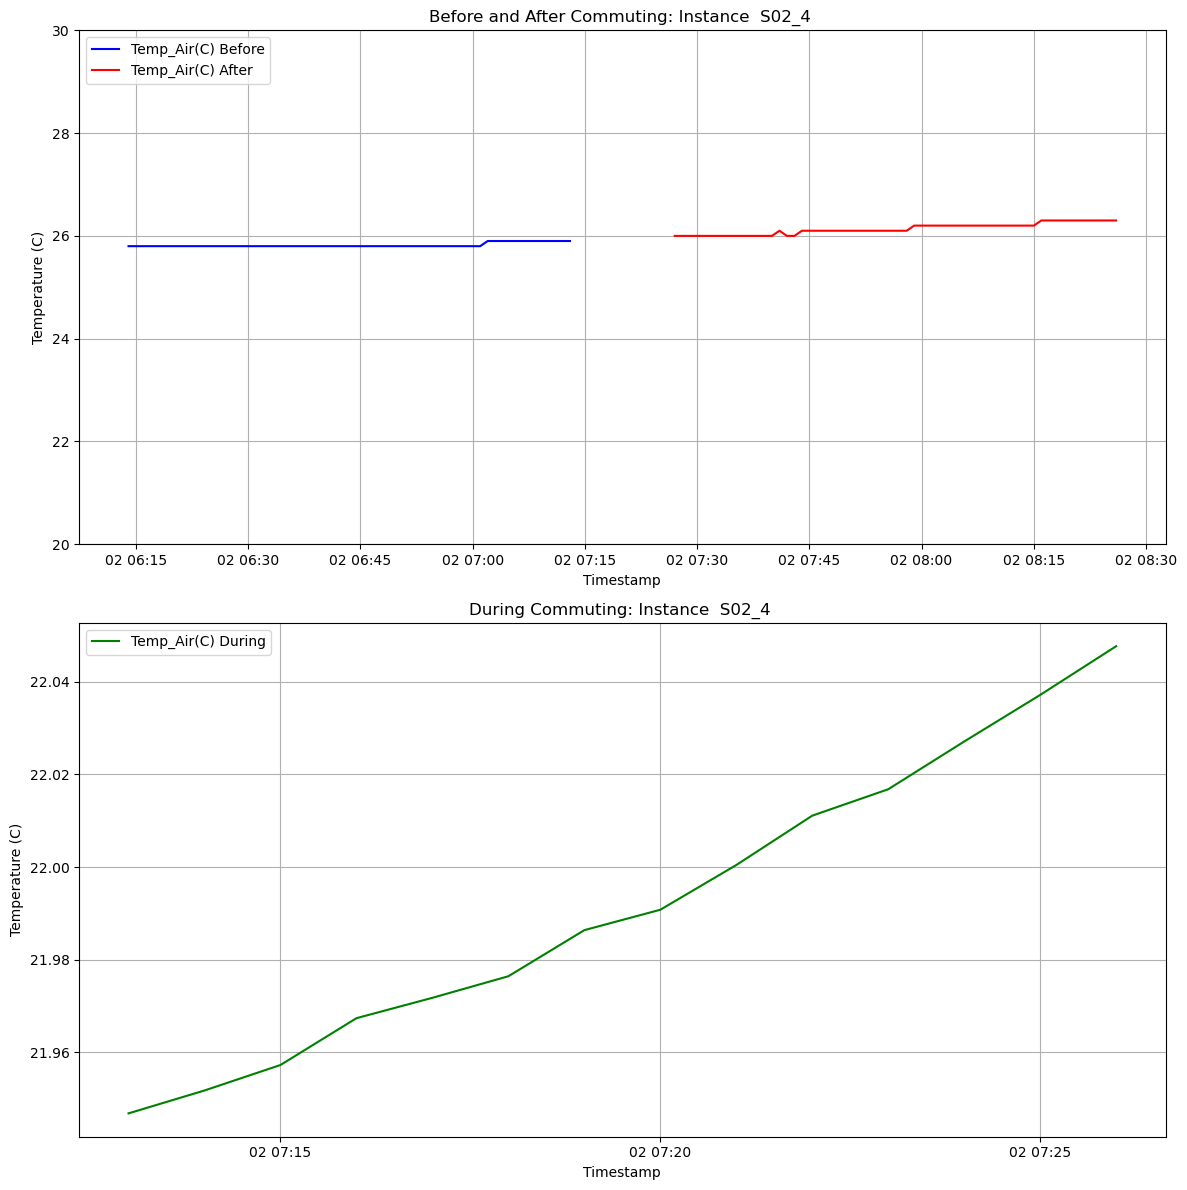

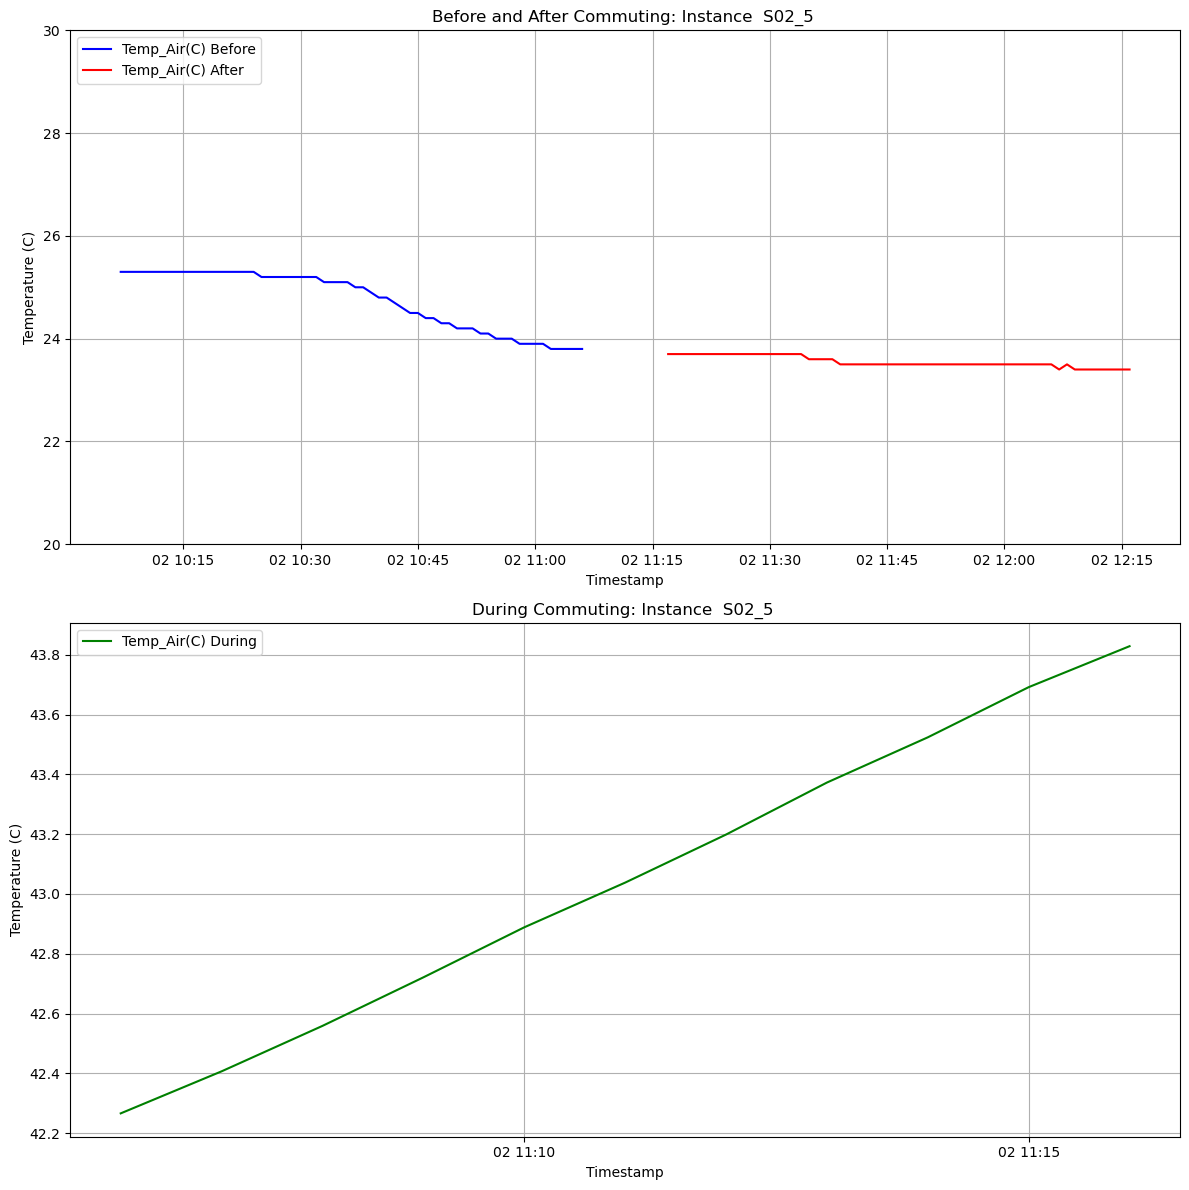

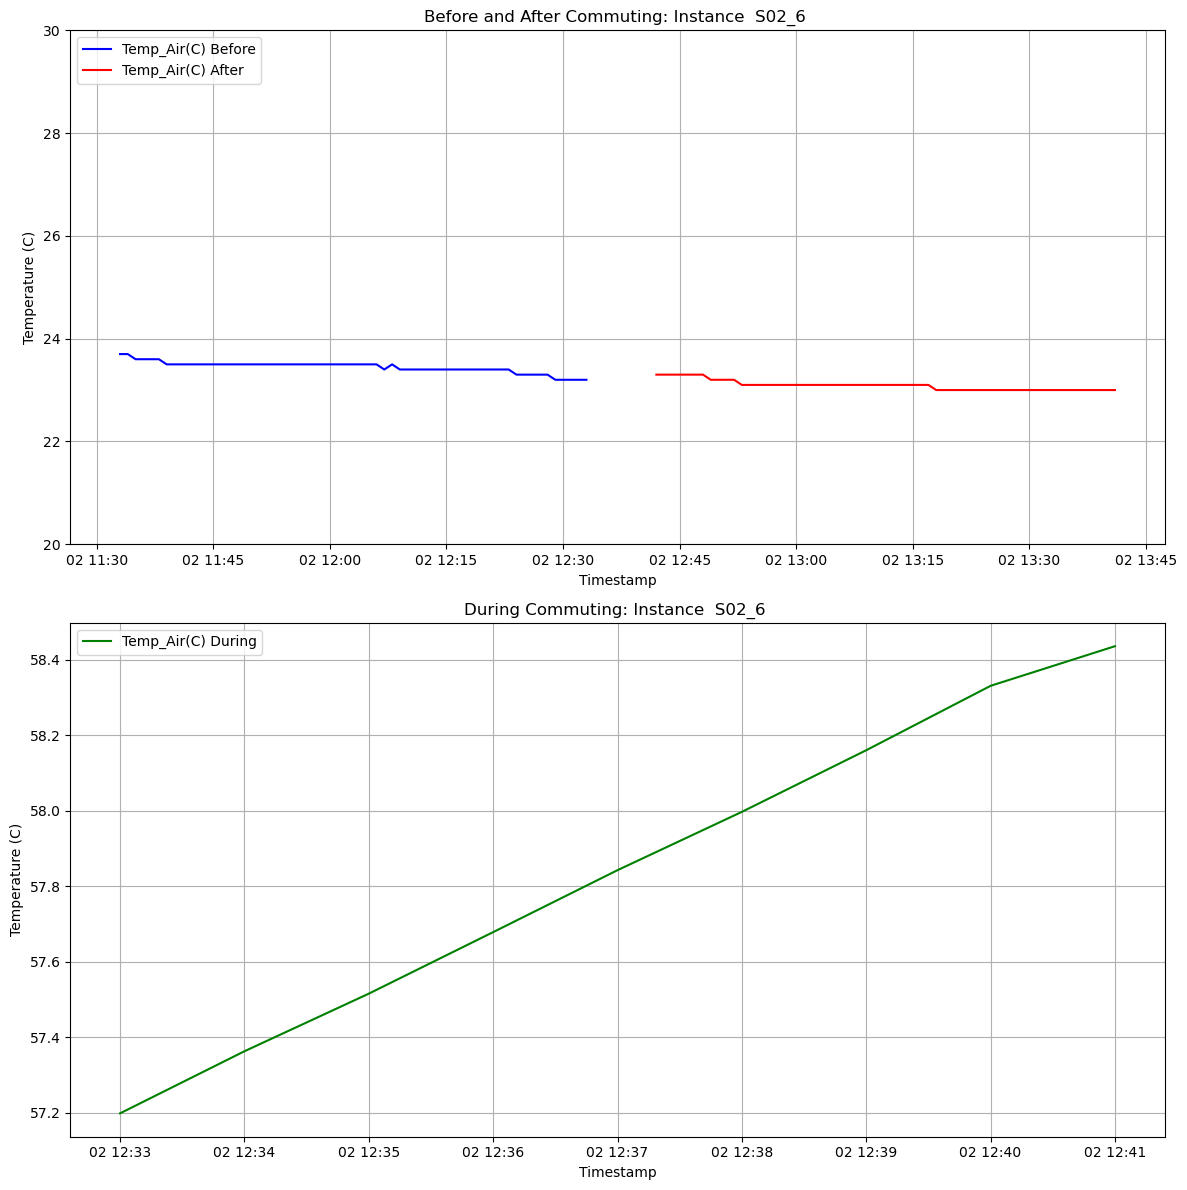

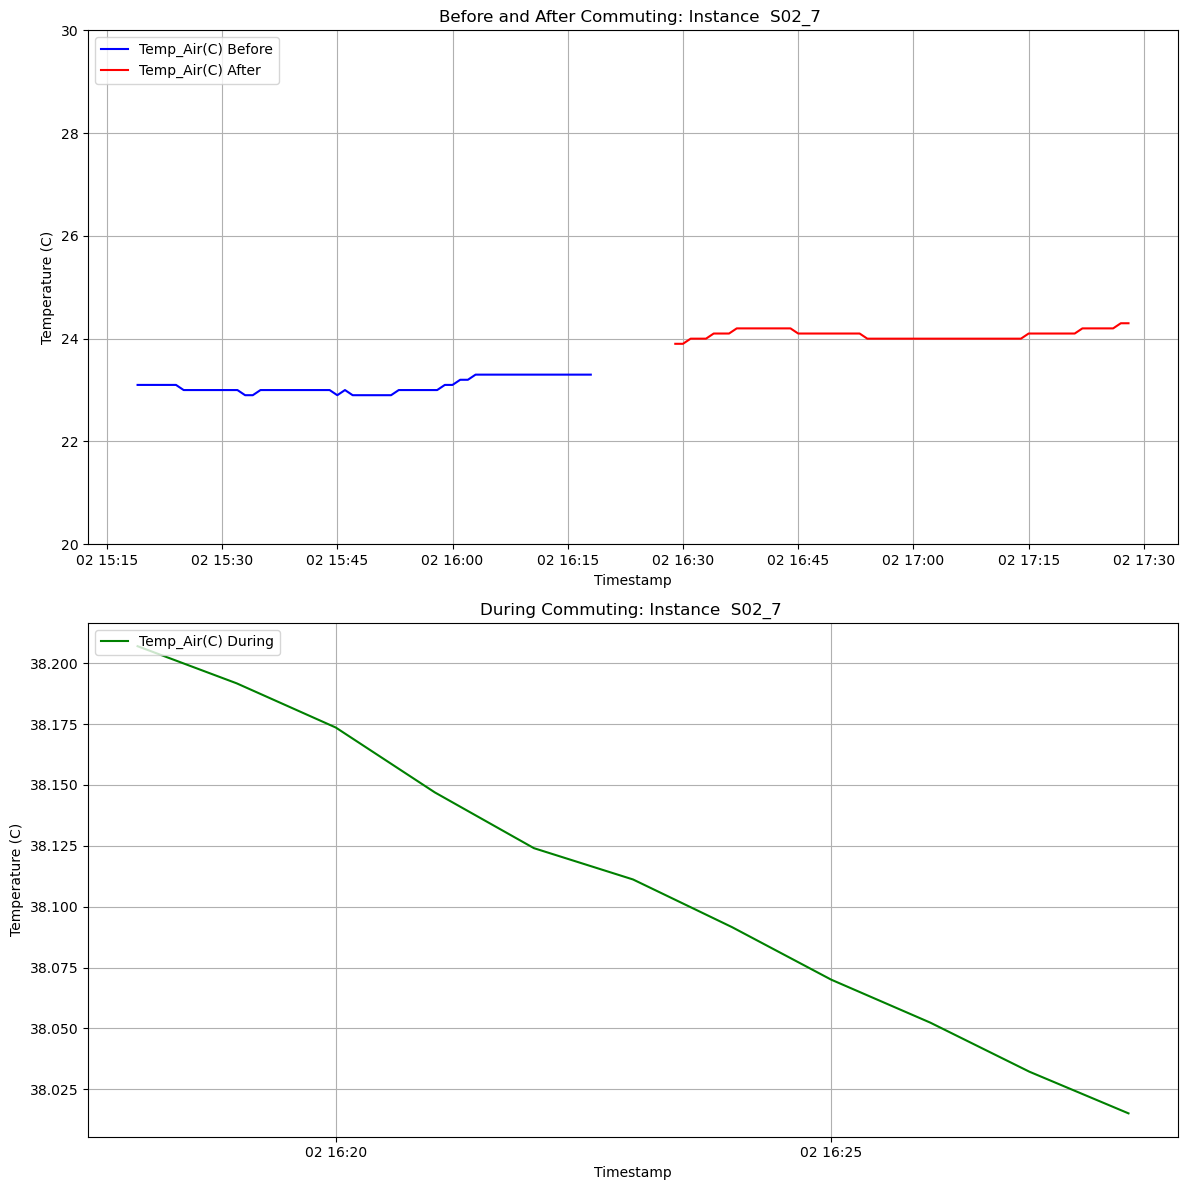

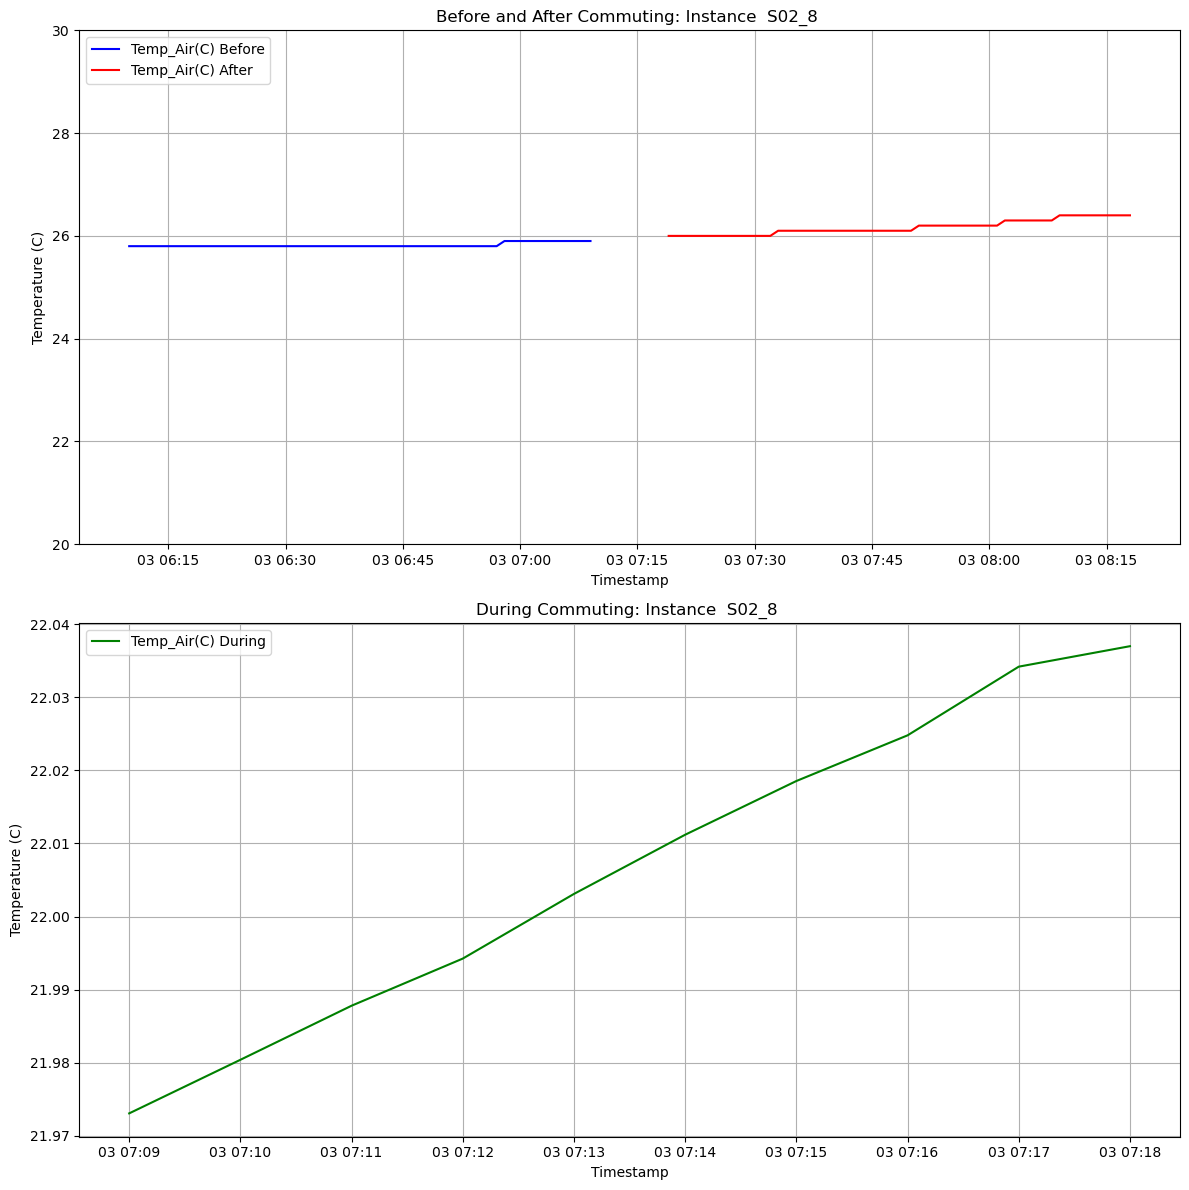

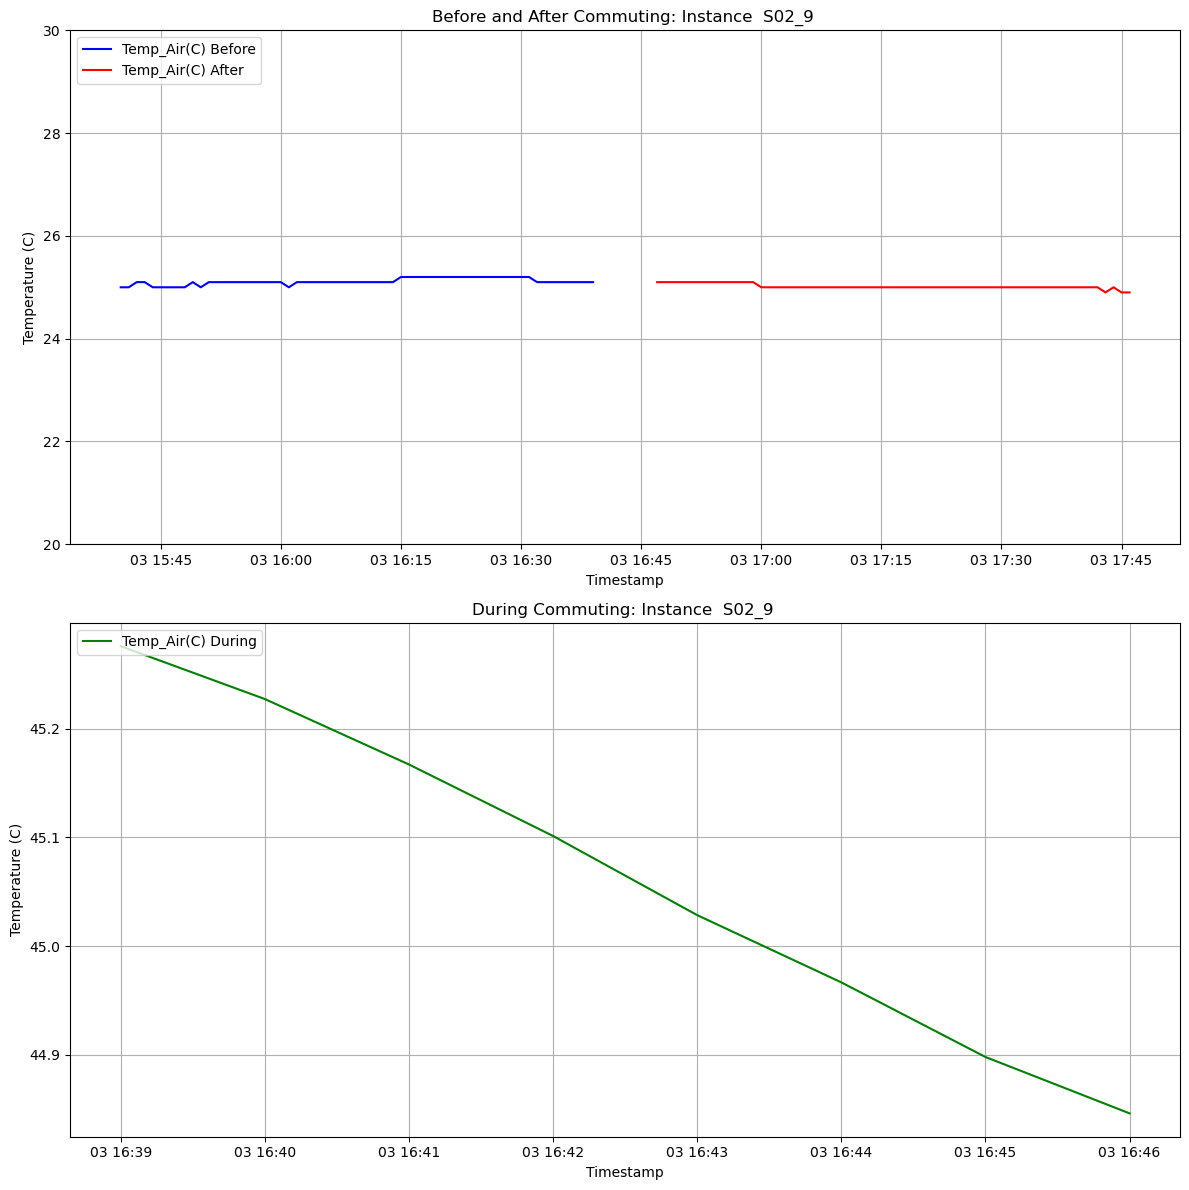

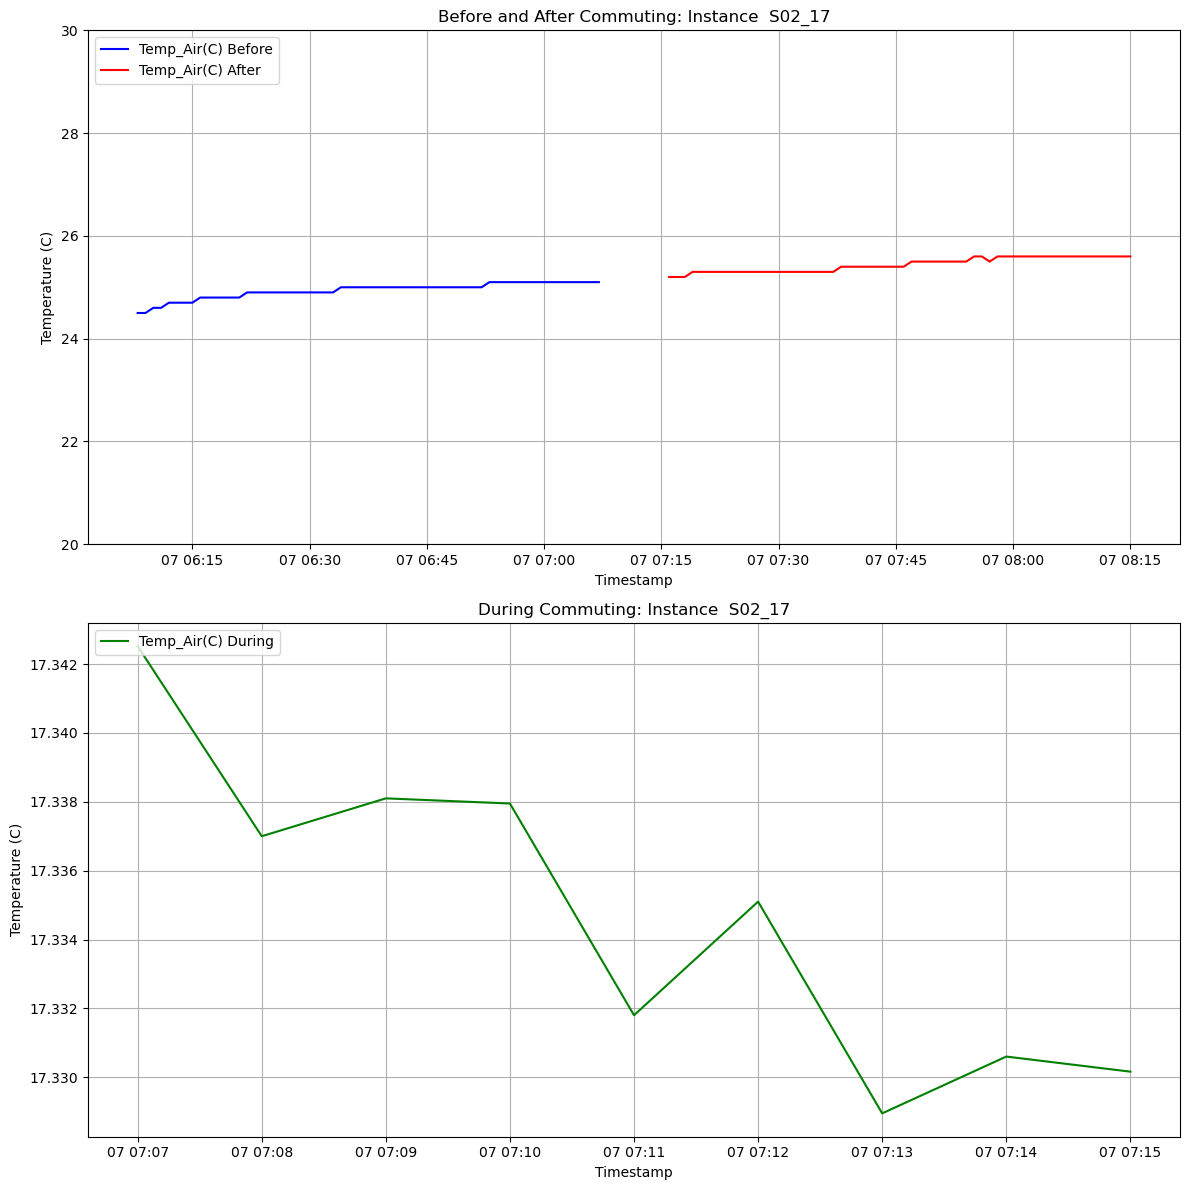

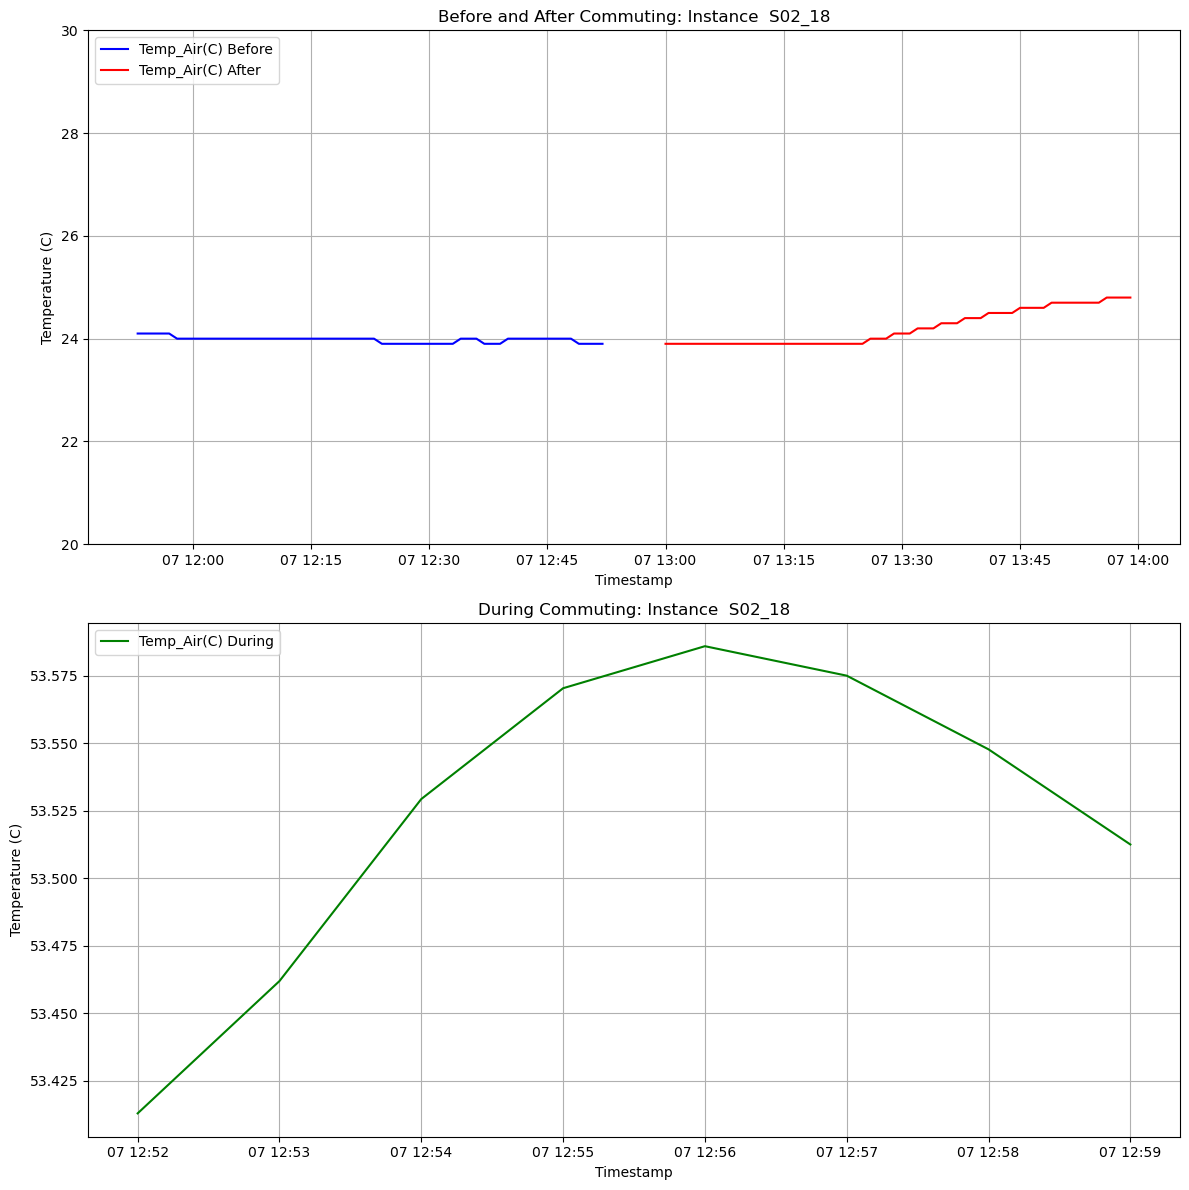

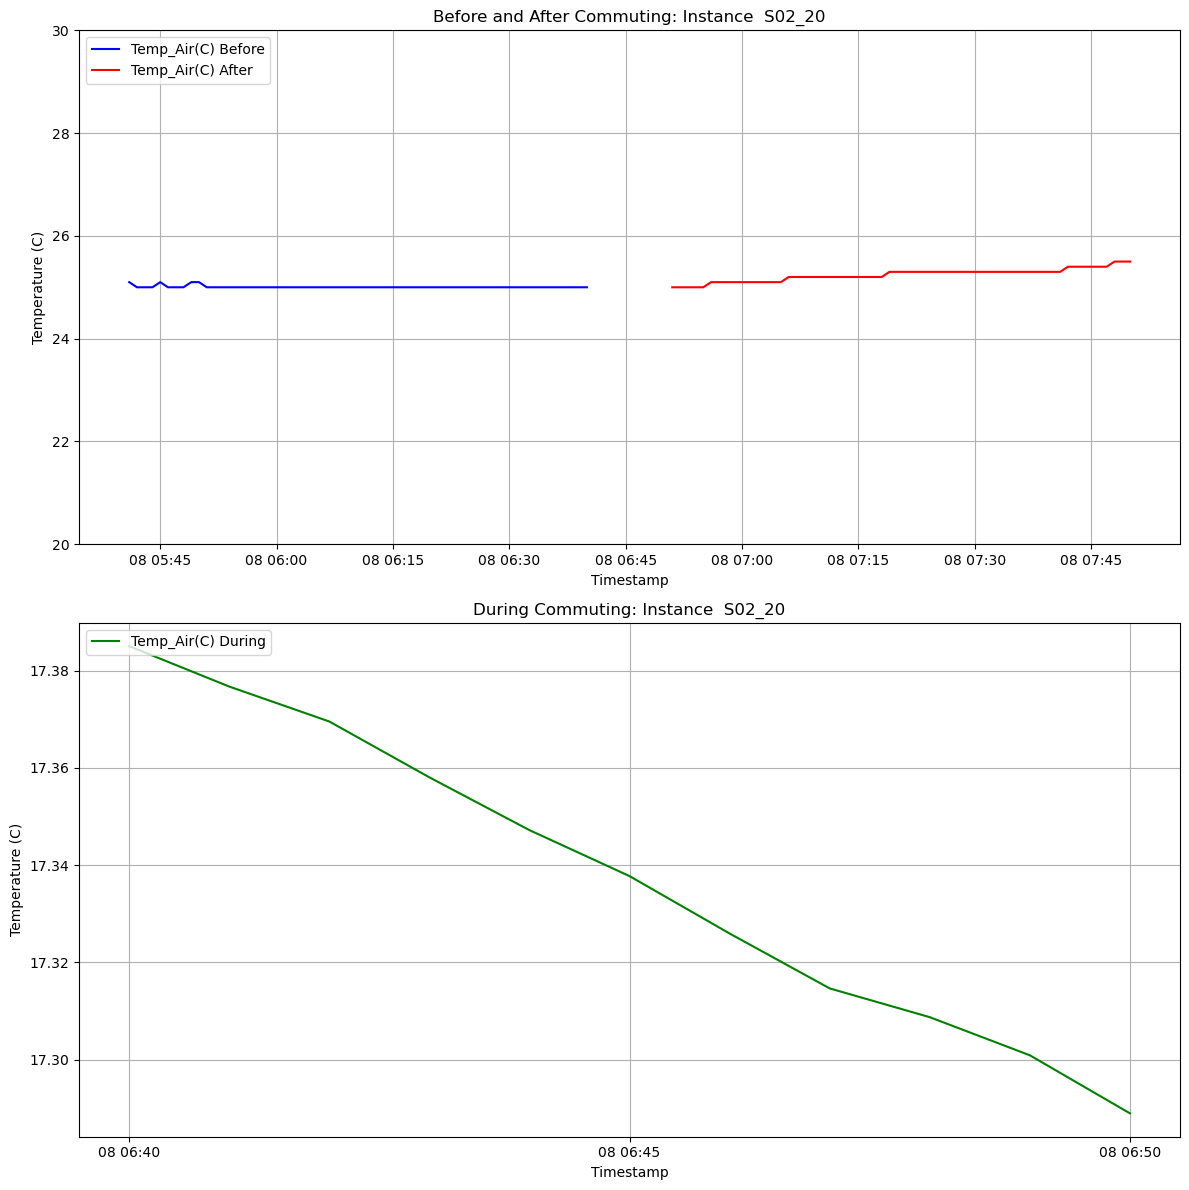

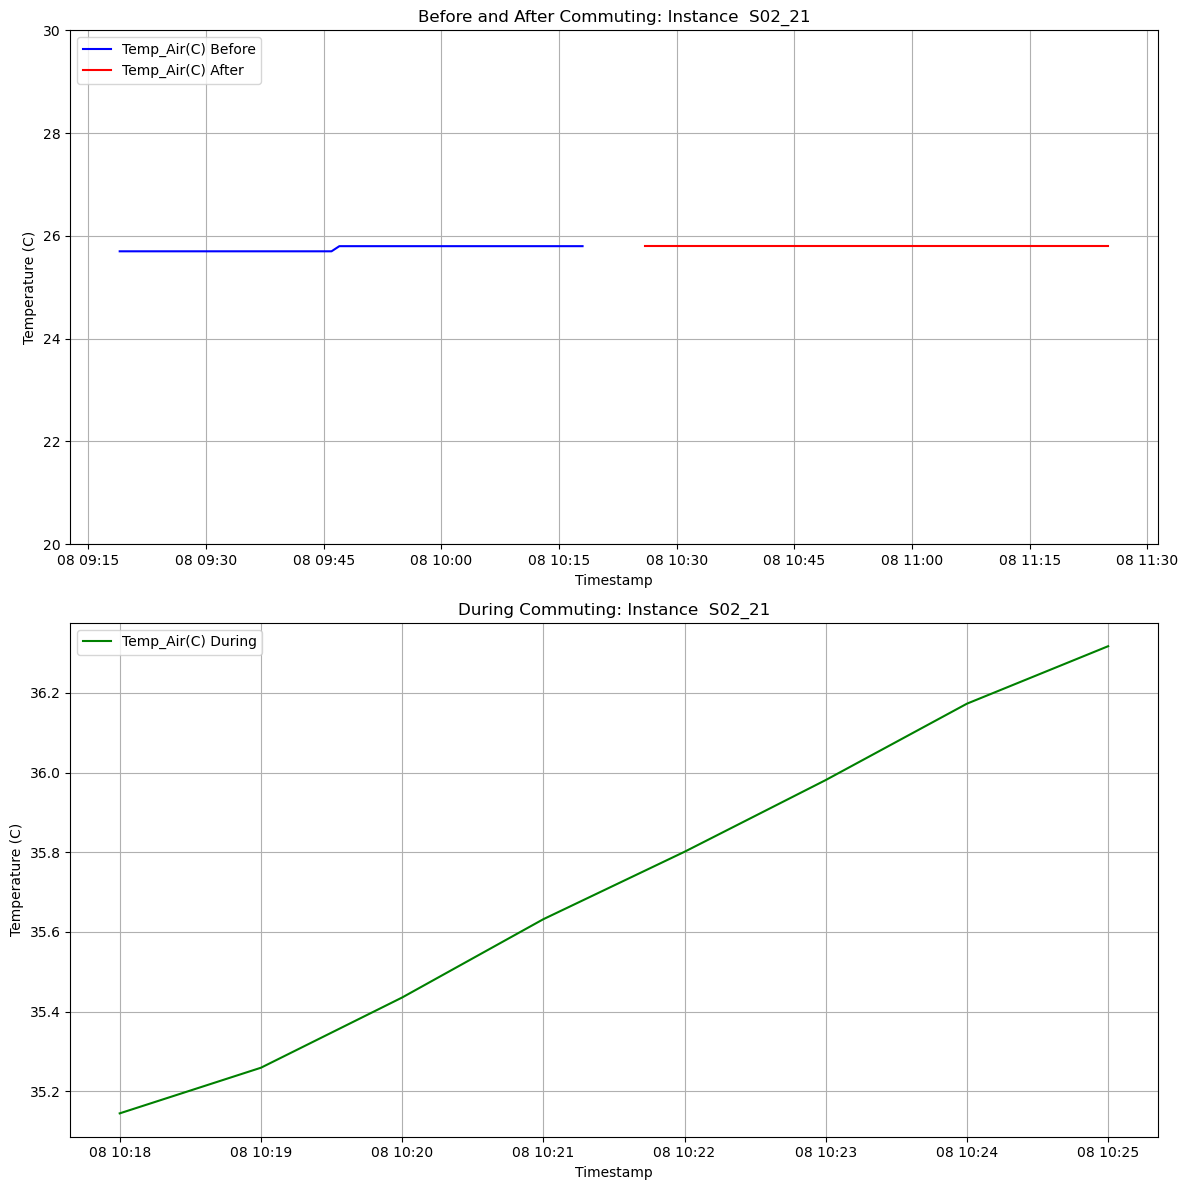

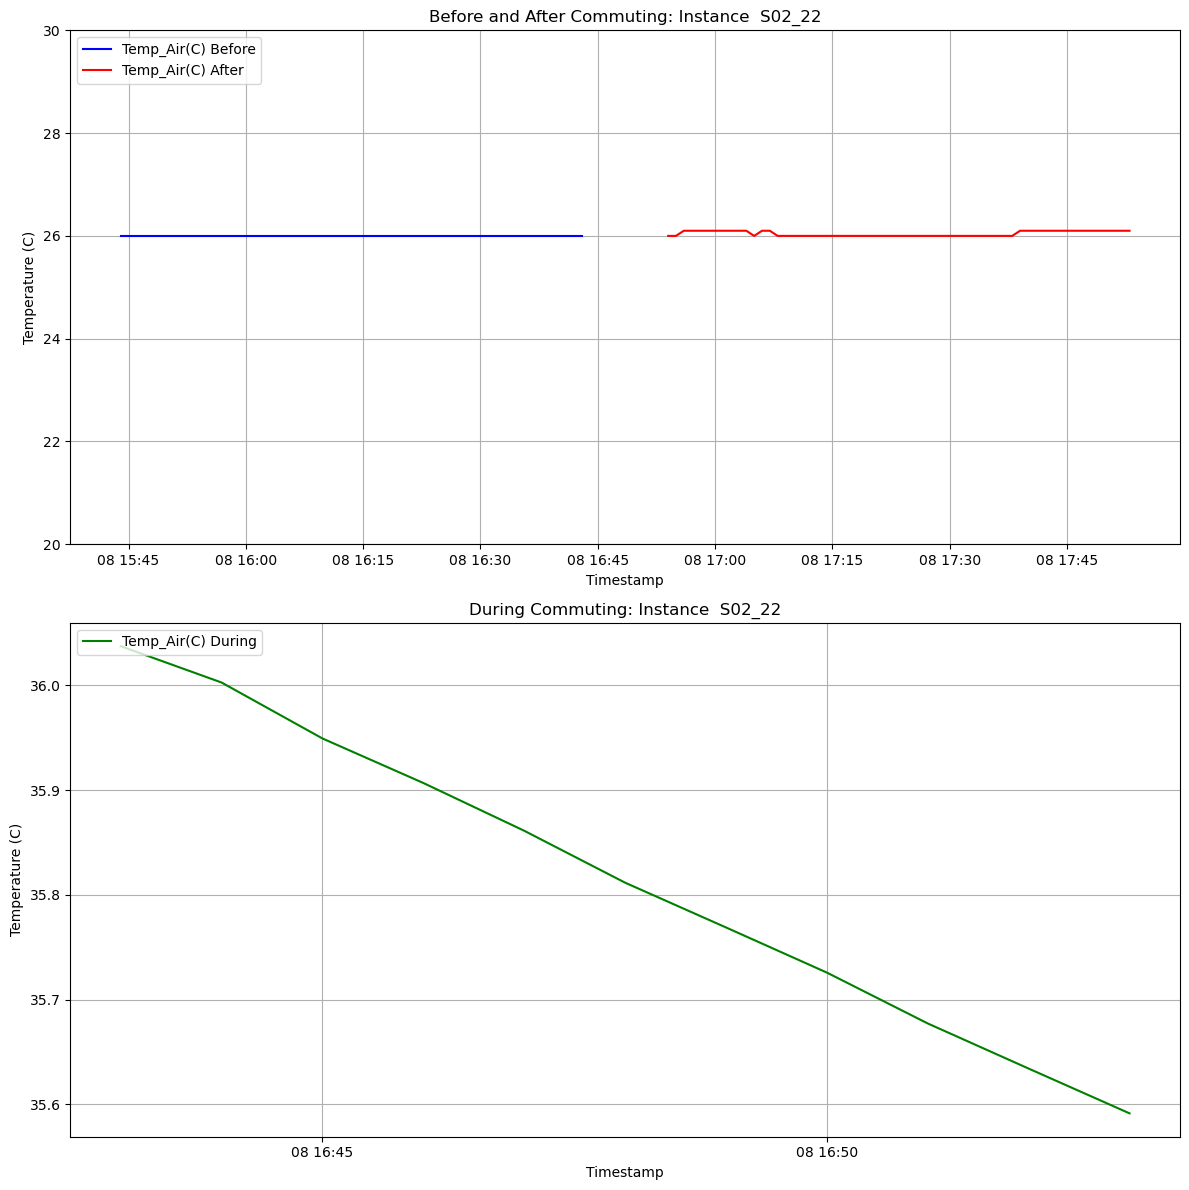

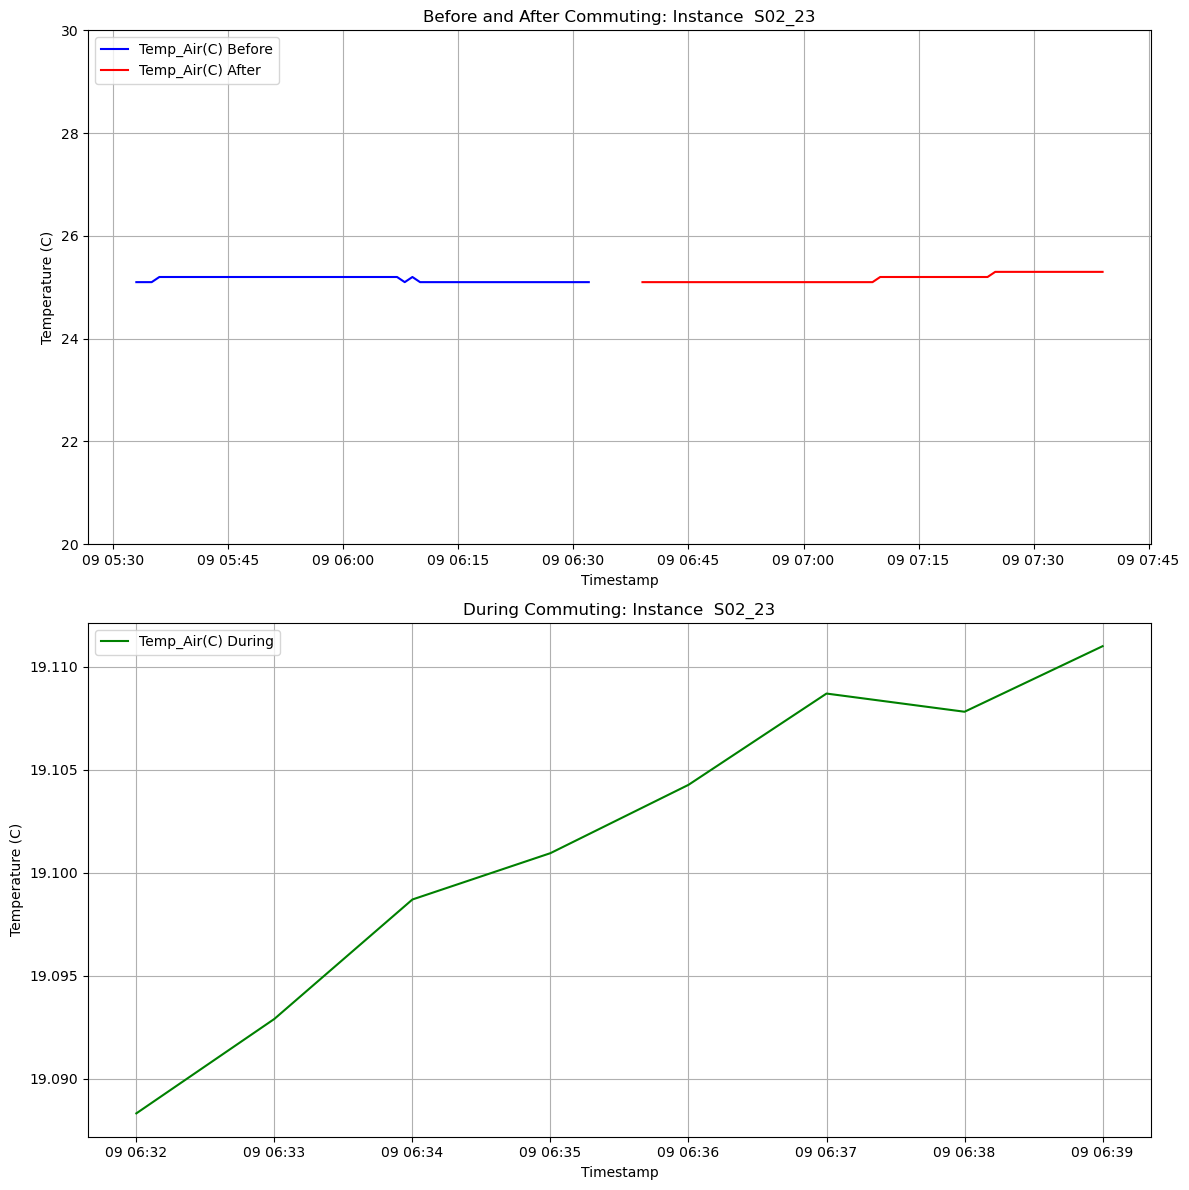

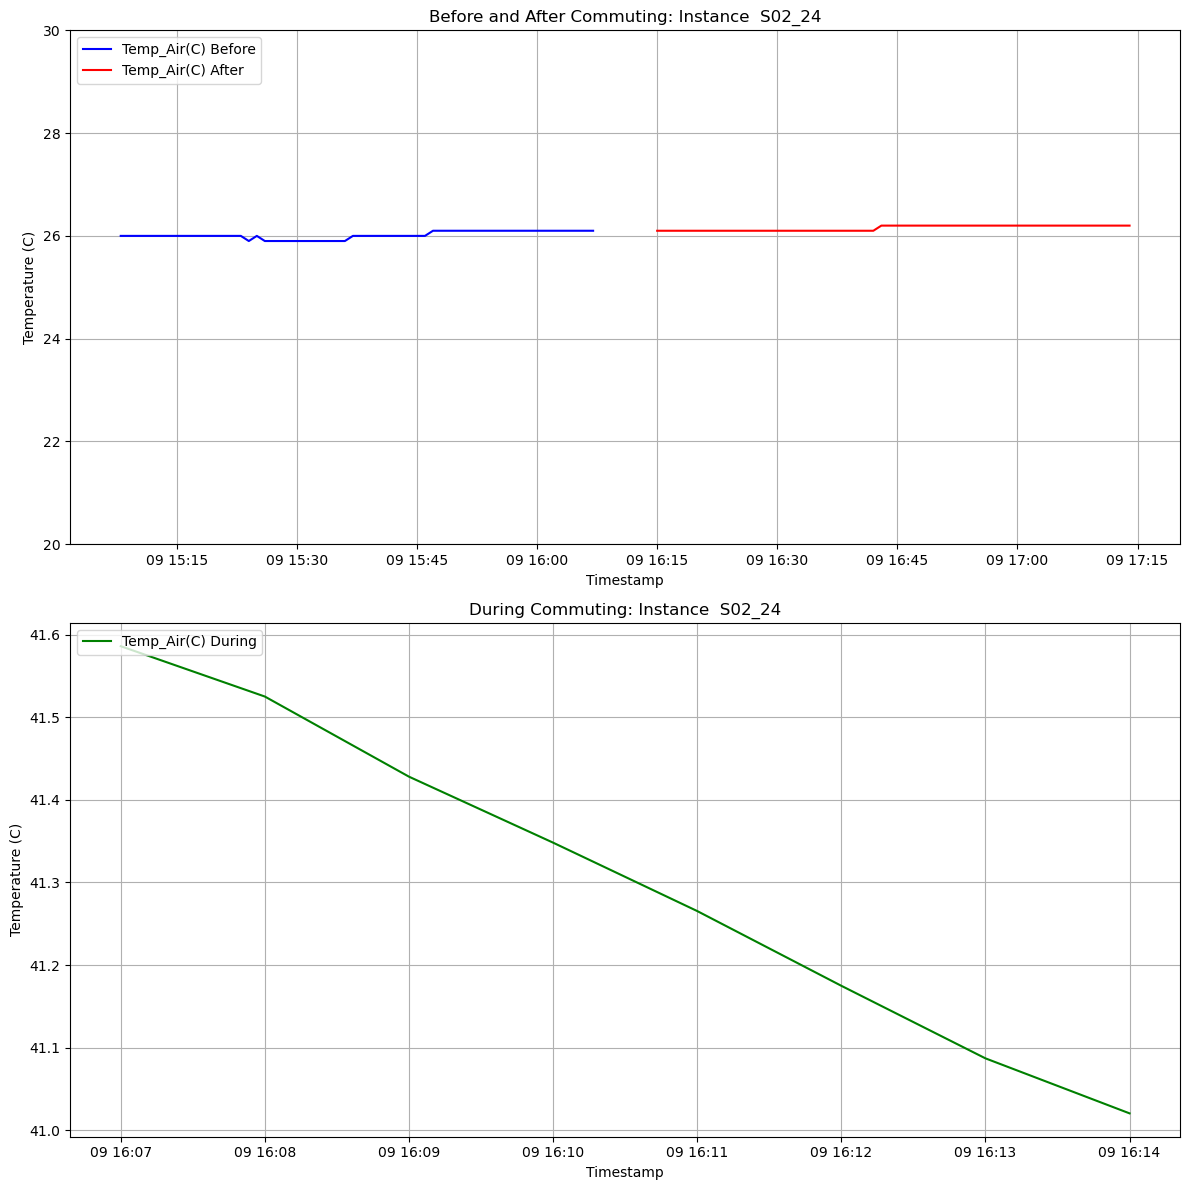

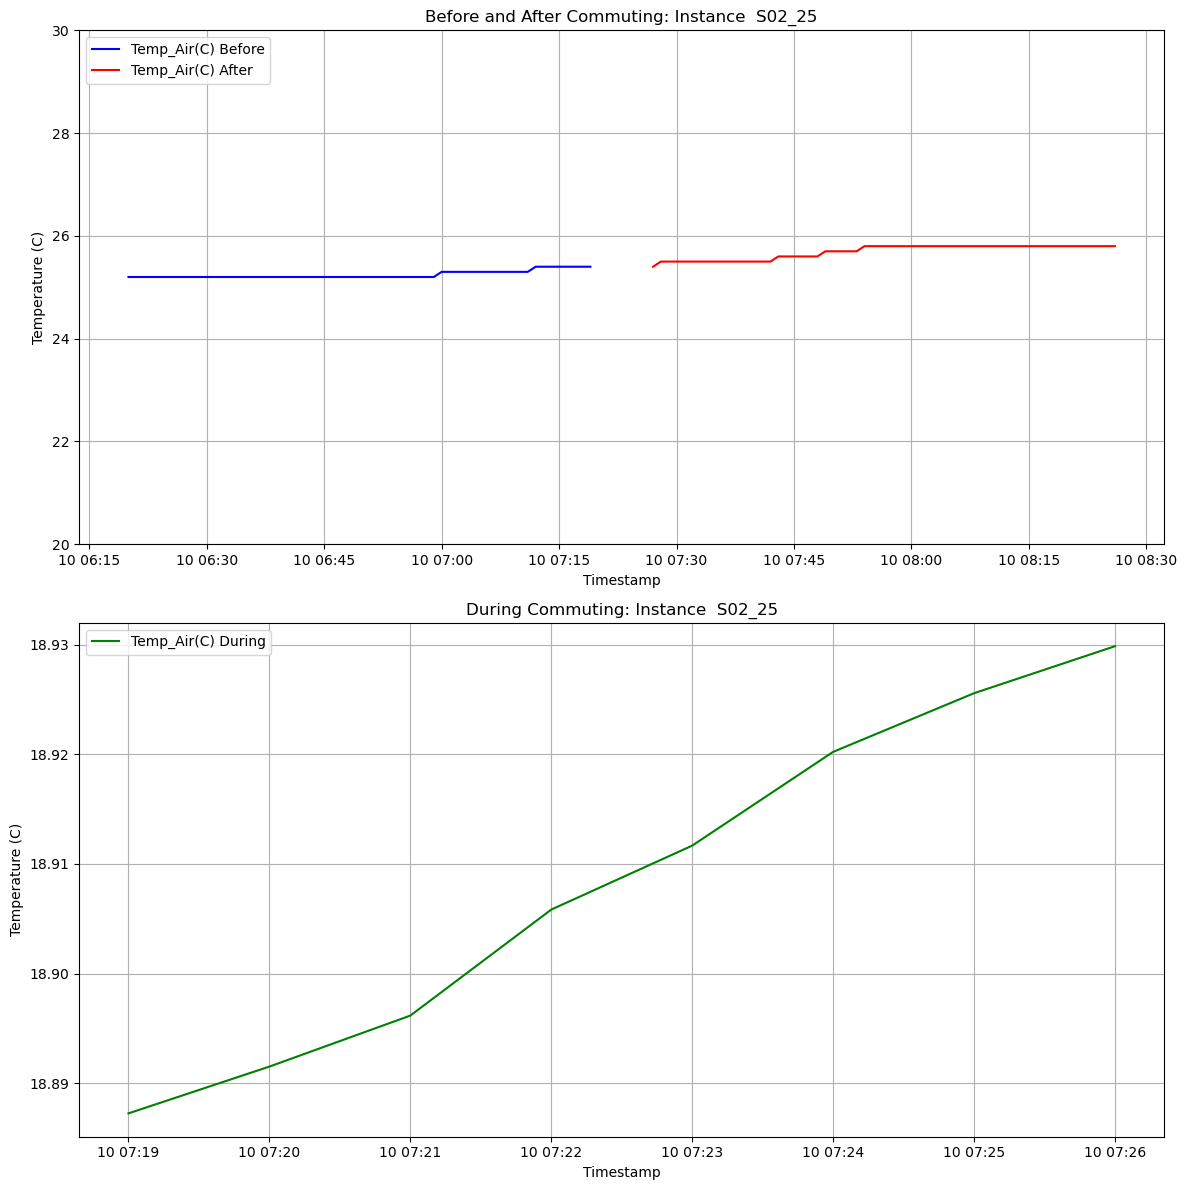

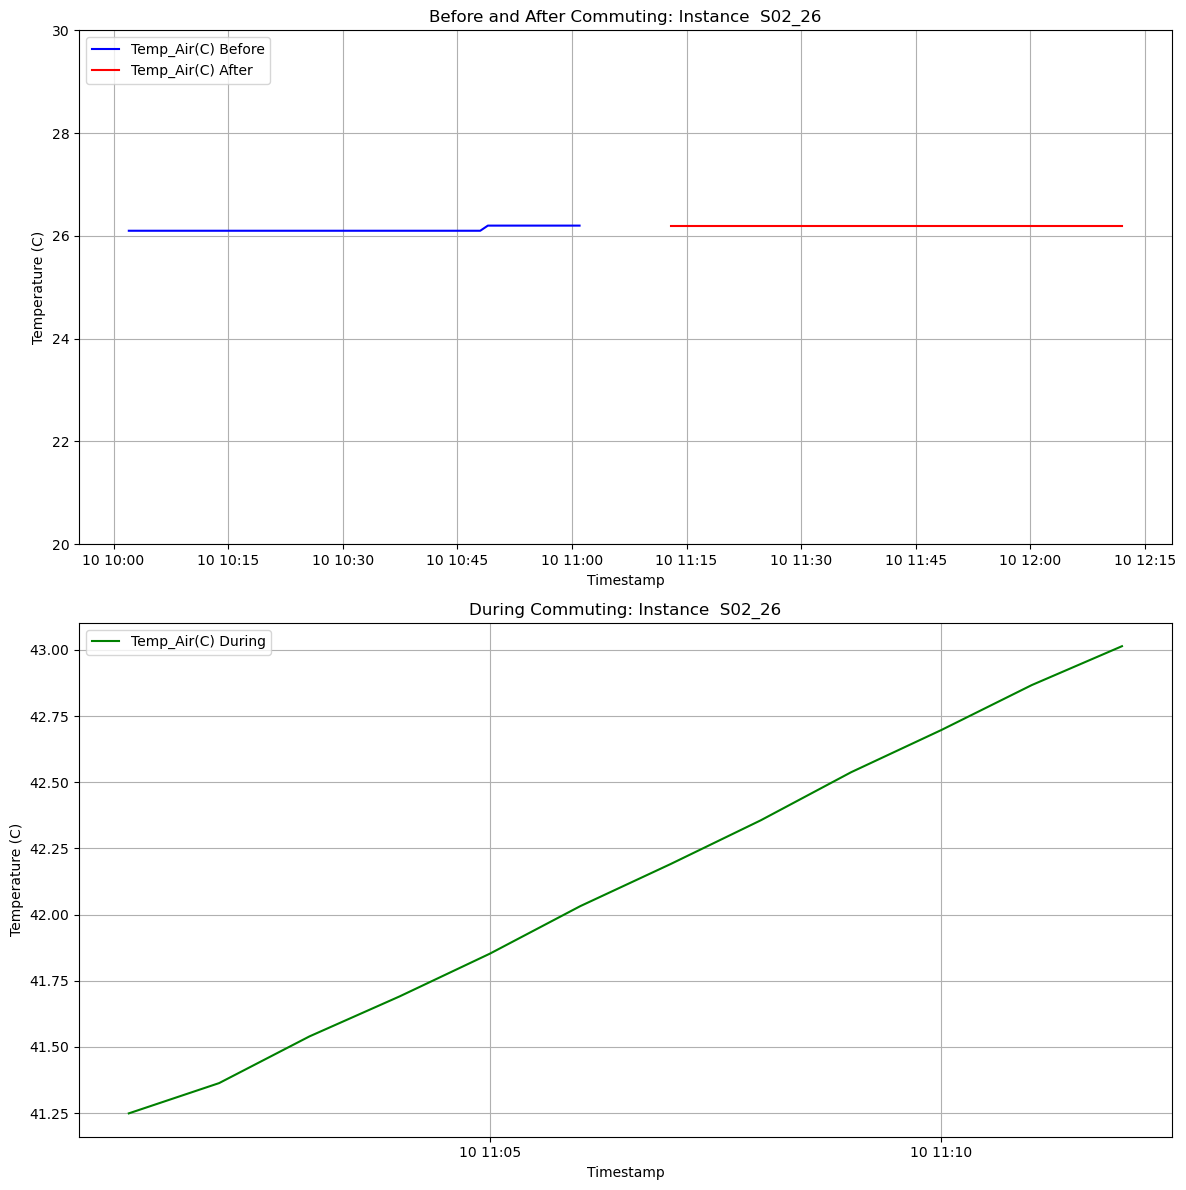

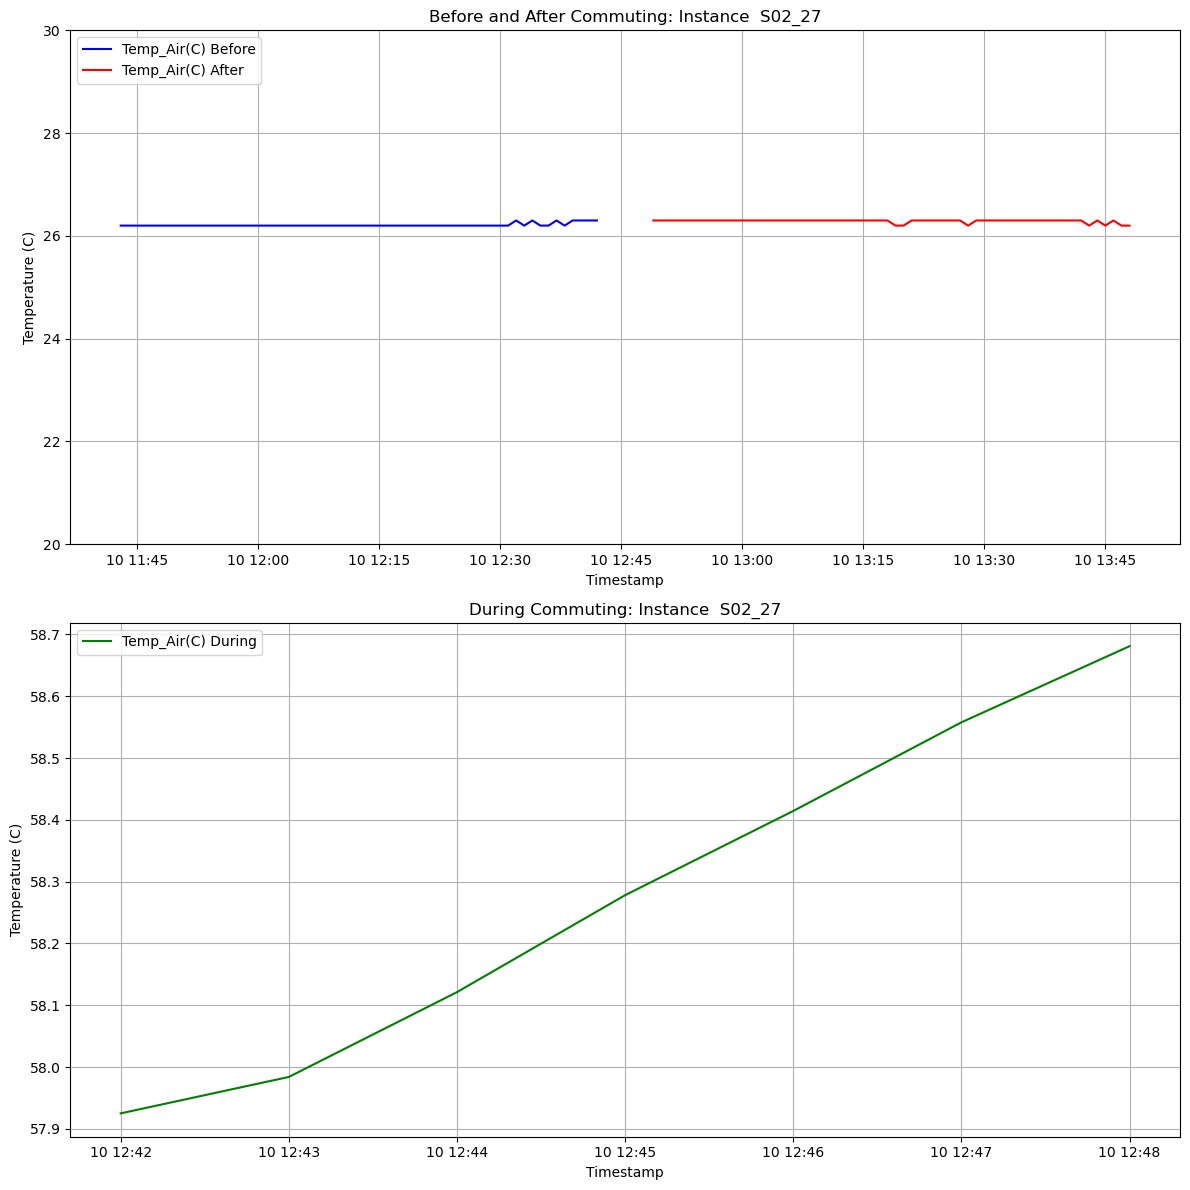

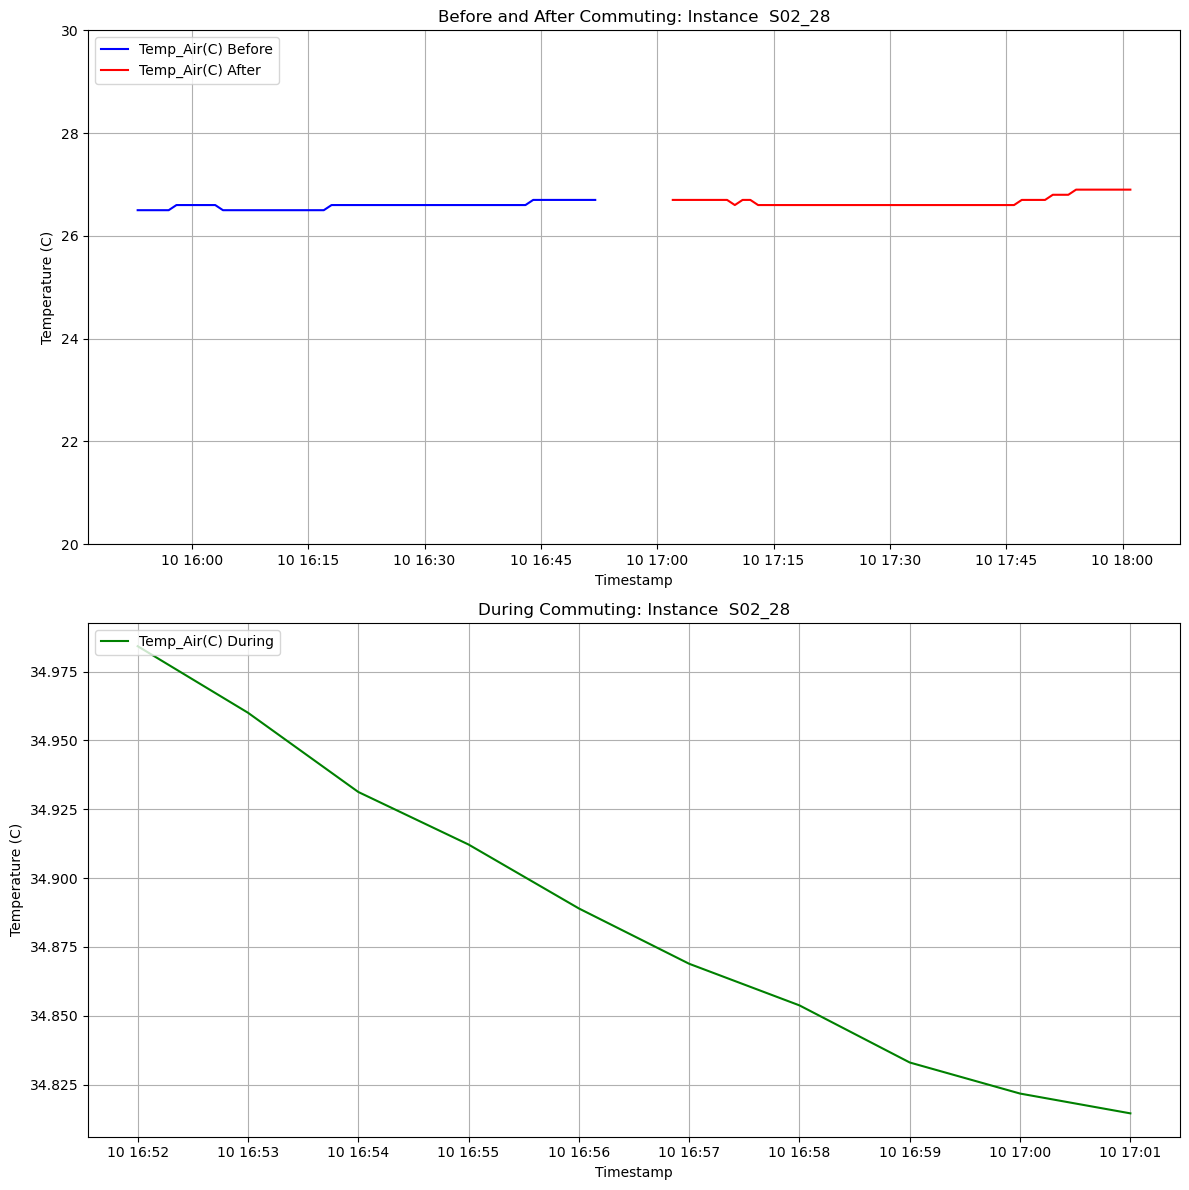

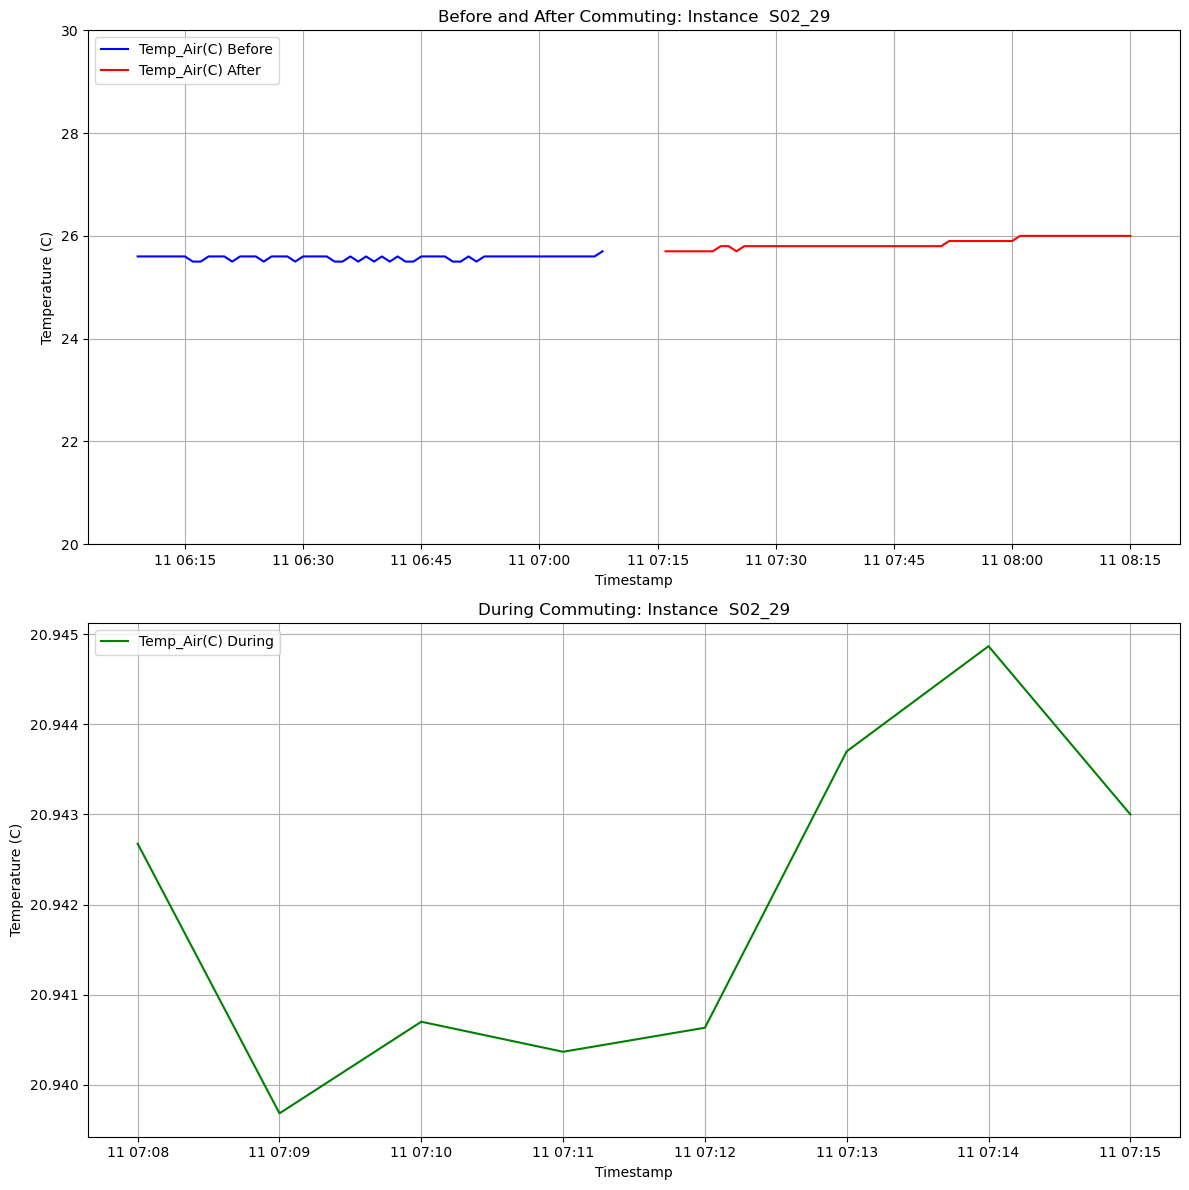

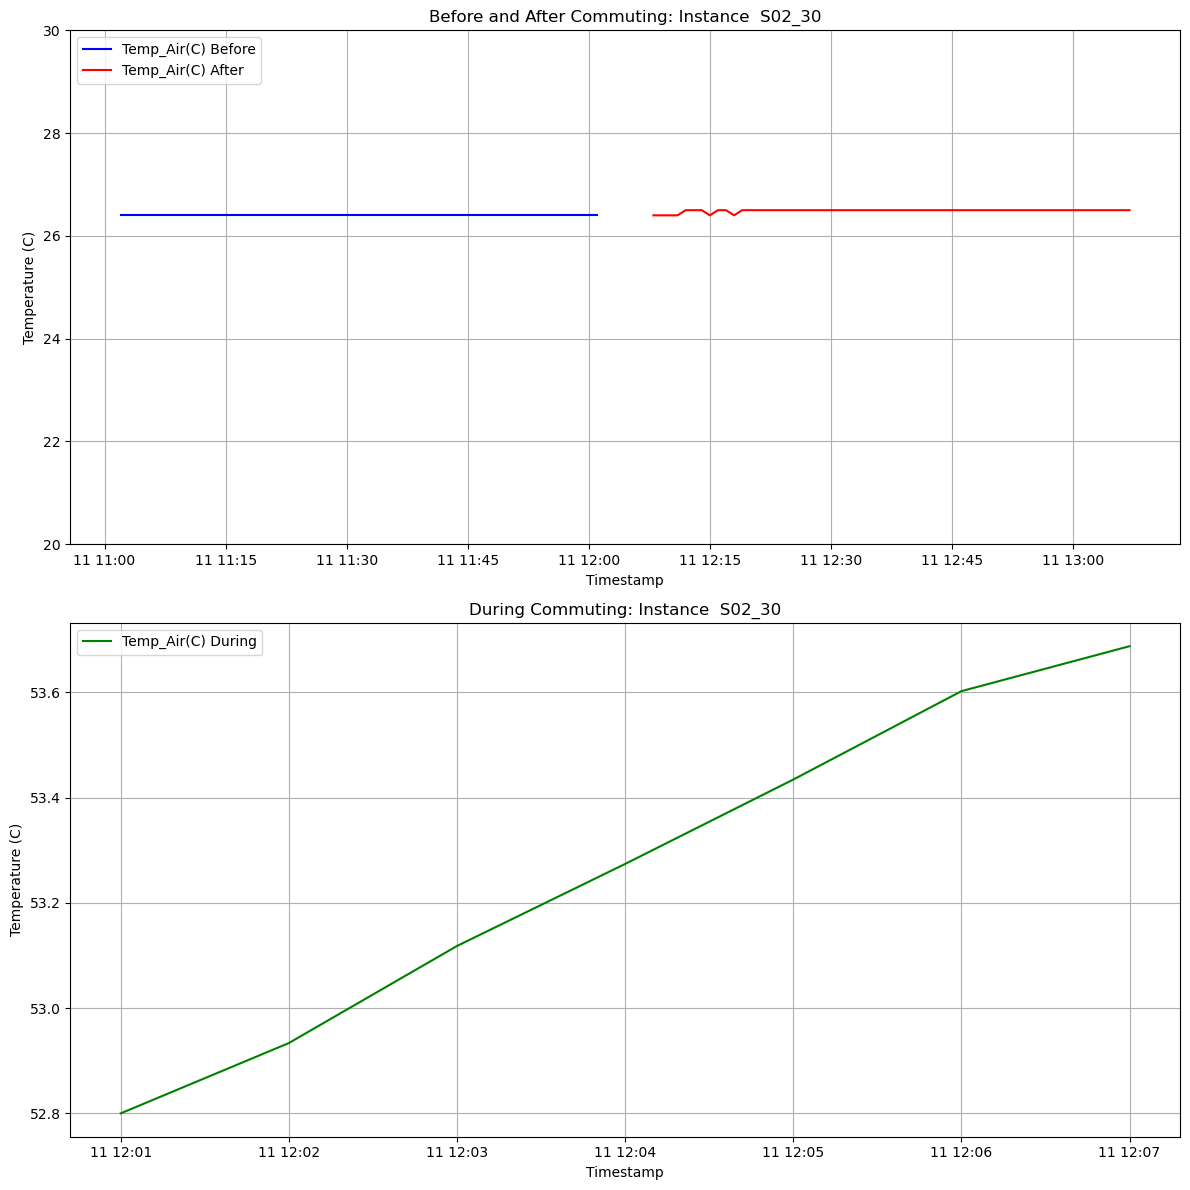

In [9]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV files
data_file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_b.csv'

data = pd.read_csv(data_file_path)
commuting_data = S02_df

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' columns to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
commuting_data['Timestamp'] = pd.to_datetime(commuting_data['DateTime'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": " S02_1 ", "Start Time": "2023-07-31 16:33:54", "End Time": "2023-07-31 16:36:38"},
    {"ID_instance": " S02_2 ", "Start Time": "2023-08-01 16:38:07", "End Time": "2023-08-01 16:54:32"},
    {"ID_instance": " S02_4 ", "Start Time": "2023-08-02 07:13:16", "End Time": "2023-08-02 07:26:44"},
    {"ID_instance": " S02_5 ", "Start Time": "2023-08-02 11:06:22", "End Time": "2023-08-02 11:16:42"},
    {"ID_instance": " S02_6 ", "Start Time": "2023-08-02 12:33:00", "End Time": "2023-08-02 12:41:28"},
    {"ID_instance": " S02_7 ", "Start Time": "2023-08-02 16:18:34", "End Time": "2023-08-02 16:28:48"},
    {"ID_instance": " S02_8 ", "Start Time": "2023-08-03 07:09:01", "End Time": "2023-08-03 07:18:02"},
    {"ID_instance": " S02_9 ", "Start Time": "2023-08-03 16:39:40", "End Time": "2023-08-03 16:46:27"},
    {"ID_instance": " S02_17", "Start Time": "2023-08-07 07:07:35", "End Time": "2023-08-07 07:15:30"},
    {"ID_instance": " S02_18", "Start Time": "2023-08-07 12:52:42", "End Time": "2023-08-07 12:59:34"},
    {"ID_instance": " S02_20", "Start Time": "2023-08-08 06:40:41", "End Time": "2023-08-08 06:50:55"},
    {"ID_instance": " S02_21", "Start Time": "2023-08-08 10:18:33", "End Time": "2023-08-08 10:25:43"},
    {"ID_instance": " S02_22", "Start Time": "2023-08-08 16:43:22", "End Time": "2023-08-08 16:53:31"},
    {"ID_instance": " S02_23", "Start Time": "2023-08-09 06:32:09", "End Time": "2023-08-09 06:39:00"},
    {"ID_instance": " S02_24", "Start Time": "2023-08-09 16:07:41", "End Time": "2023-08-09 16:14:22"},
    {"ID_instance": " S02_25", "Start Time": "2023-08-10 07:19:12", "End Time": "2023-08-10 07:26:47"},
    {"ID_instance": " S02_26", "Start Time": "2023-08-10 11:01:34", "End Time": "2023-08-10 11:12:30"},
    {"ID_instance": " S02_27", "Start Time": "2023-08-10 12:42:41", "End Time": "2023-08-10 12:48:16"},
    {"ID_instance": " S02_28", "Start Time": "2023-08-10 16:52:05", "End Time": "2023-08-10 17:01:36"},
    {"ID_instance": " S02_29", "Start Time": "2023-08-11 07:08:23", "End Time": "2023-08-11 07:15:03"},
    {"ID_instance": " S02_30", "Start Time": "2023-08-11 12:01:19", "End Time": "2023-08-11 12:07:27"}
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Define y-axis limits for consistency
primary_y_axis_limits = (20, 30)

# Function to plot temperature data before, during, and after for each instance
def plot_temperatures_full(commuting_instances, data, commuting_data):
    for instance in commuting_instances:
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before, during, and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        during_data = commuting_data[(commuting_data['Timestamp'] >= start_time) & (commuting_data['Timestamp'] <= end_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Resample to make smoother curves
        before_data = before_data[['Timestamp', 'Temp_Air(C)']].resample('min', on='Timestamp').mean().interpolate()
        during_data = during_data[['Timestamp', 'Temp(C)_N1']].resample('min', on='Timestamp').mean().interpolate()
        after_data = after_data[['Timestamp', 'Temp_Air(C)']].resample('min', on='Timestamp').mean().interpolate()

        # Plot the data
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

        # Plot Before and After Commuting on the first subplot
        ax1.plot(before_data.index, before_data['Temp_Air(C)'], label='Temp_Air(C) Before', color='blue')
        ax1.plot(after_data.index, after_data['Temp_Air(C)'], label='Temp_Air(C) After', color='red')
        ax1.set_ylim(primary_y_axis_limits)
        ax1.set_title(f'Before and After Commuting: Instance {instance_id}')
        ax1.set_xlabel('Timestamp')
        ax1.set_ylabel('Temperature (C)')
        ax1.legend(loc='upper left')
        ax1.grid(True)

        # Plot During Commuting on the second subplot
        ax2.plot(during_data.index, during_data['Temp(C)_N1'], label='Temp_Air(C) During', color='green')
        ax2.set_title(f'During Commuting: Instance {instance_id}')
        ax2.set_xlabel('Timestamp')
        ax2.set_ylabel('Temperature (C)')
        ax2.legend(loc='upper left')
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

# Visualize the temperature data for each commuting instance, including during commuting
plot_temperatures_full(commuting_instances, data, commuting_data)
